# Generalities for GANs

* Import libraries
* Run on GPU if possible
* Create data loaders

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt

# create directory to save results
!mkdir results

# script parameters
batch_size = 128
log_interval = 100

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# create data loaders
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Neural Network class

* Generator
* Discriminator


In [2]:
# Generator Network
class Generator(nn.Module):

    # declare layers
    def __init__(self):
        super(Generator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(20, 400)
        self.fc2 = nn.Linear(400, 784)

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 784 nodes
    def forward(self, z):

        # dummy assignment until this function is filled in
        probabilities = torch.rand(z.shape[0],784).to(device)
        h = F.relu(self.fc1(z))
        probabilities = torch.sigmoid(self.fc2(h))
        return probabilities

# Discriminator Network
class Discriminator(nn.Module):

    # declare layers
    def __init__(self):
        super(Discriminator, self).__init__()

        # dummy assignment until this function is filled in
        # self.fc1 = nn.Linear(1, 1)
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 1)

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 1 node
    def forward(self, x):

        # dummy assignment until this function is filled in
        probabilties = torch.rand(x.shape[0],1).to(device)
        h1 = F.relu(self.fc1(x.view(-1,784)))
        probabilities = torch.sigmoid(self.fc2(h1))
        return probabilities

# Loss Function

In [3]:
# GAN Loss Function
#
# Inputs:
#    predictions: array of probabilities indicating whether the images are real or fake 
#    targets: array of 1s (real image) and 0s (fake image)
#
# Output:
#    BCE: binary cross entropy (scalar)
#
def gan_loss_function(predictions, targets):

    # dummy assignment until this function is filled in
    BCE = 0
    BCE = F.binary_cross_entropy(predictions, targets, reduction ='sum')
    return BCE

# Training

In [4]:
# GAN Training
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    generator_optimizer: generator optimizer
#    discriminator: discriminator network
#    discriminator_optimizer: discriminator optimizer
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_train(epoch, generator, generator_optimizer, discriminator, discriminator_optimizer):

    # dummy assignment until this function is filled in
    average_discriminator_loss = 0
    average_generator_loss = 0
    real = 1
    fake = 0
    G_losses = []
    D_losses = []
    for batch_idx, (data,_) in enumerate(train_loader):
      # print(batch_idx)
      data = data.to(device)
      discriminator_optimizer.zero_grad()
      b_size = len(data)
      # print("bzsize ", b_size)
      output = discriminator(data.view(-1,784)).view(b_size)
      target = torch.full((b_size,), real, dtype=torch.float, device=device)
      # print("target ", target.size())
      errD_real = gan_loss_function(output, target)
      errD_real.backward()
      D_x = output.mean().item()

      sample = torch.randn(64, 20).to(device)
      sample = generator(sample).to(device)
      b_size = len(sample)
      target = torch.full((b_size,), fake, dtype=torch.float, device=device)
      # print("target ", target.size())
      output = discriminator(sample.detach().view(-1,784)).view(-1)
      errD_fake = gan_loss_function(output, target)
      errD_fake.backward()
      D_G_z1 = output.mean().item()
      errD = errD_real + errD_fake
      discriminator_optimizer.step()

      generator_optimizer.zero_grad()
      target.fill_(real)
      output = discriminator(sample.view(-1,784)).view(-1)
      errG = gan_loss_function(output, target)
      errG.backward()
      D_G_z2 = output.mean().item()
      generator_optimizer.step()
      if batch_idx % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, epochs, batch_idx*len(data), len(train_loader.dataset),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
      G_losses.append(errG.item())
      D_losses.append(errD.item())
    average_generator_loss = sum(G_losses) / len(train_loader.dataset)
    average_discriminator_loss = sum(D_losses) / len(train_loader.dataset)
    print('====> Epoch: {} Average generator loss: {:.4f} Average discriminator loss: {:.4f}'.format(
        epoch, average_generator_loss, average_discriminator_loss))
    return average_generator_loss, average_discriminator_loss


# Testing


In [5]:
# GAN Test
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    discriminator: discriminator network
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_test(epoch, generator, discriminator):

    # dummy assignment until this function is filled in
    average_generator_loss = 0
    average_discriminator_loss = 0
    G_losses = []
    D_losses = []
    generator.eval()
    discriminator.eval()
    real = 1
    fake = 0
    with torch.no_grad():
      for i, (data,_) in enumerate(test_loader):
        data = data.to(device)
        b_size = data.size(0)
        output = discriminator(data.view(-1,784)).view(b_size)
        target = torch.full((b_size,), real, dtype=torch.float, device=device)
        errD_real = gan_loss_function(output, target)
        D_x = output.mean().item()

        sample = torch.randn(64, 20).to(device)
        sample = generator(sample).to(device)
        b_size = len(sample)
        target = torch.full((b_size,), fake, dtype=torch.float, device=device)
        output = discriminator(sample.detach().view(-1,784)).view(b_size)
        errD_fake = gan_loss_function(output, target)
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake

        target.fill_(real)
        output = discriminator(sample.view(-1,784)).view(b_size)
        errG = gan_loss_function(output, target)
        D_G_z2 = output.mean().item()

      G_losses.append(errG.item())
      D_losses.append(errD.item())
      average_generator_loss = sum(G_losses) / len(train_loader.dataset)
      average_discriminator_loss = sum(D_losses) / len(train_loader.dataset)
    print('====> Epoch: {} Test Average generator loss: {:.4f} Test Average discriminator loss: {:.4f}'.format(
          epoch, average_generator_loss, average_discriminator_loss))
    return average_generator_loss, average_discriminator_loss

# Main

[1/50][0/60000]	Loss_D: 136.0530	Loss_G: 90.0952	D(x): 0.4845	D(G(z)): 0.4912 / 0.2447
[1/50][6400/60000]	Loss_D: 87.1664	Loss_G: 119.3949	D(x): 0.7253	D(G(z)): 0.3636 / 0.1567
[1/50][12800/60000]	Loss_D: 16.2373	Loss_G: 247.4374	D(x): 0.9369	D(G(z)): 0.0831 / 0.0219
[1/50][19200/60000]	Loss_D: 5.1517	Loss_G: 317.9644	D(x): 0.9776	D(G(z)): 0.0168 / 0.0073
[1/50][25600/60000]	Loss_D: 2.9060	Loss_G: 372.2888	D(x): 0.9849	D(G(z)): 0.0081 / 0.0035
[1/50][32000/60000]	Loss_D: 1.5919	Loss_G: 378.2494	D(x): 0.9926	D(G(z)): 0.0066 / 0.0032
[1/50][38400/60000]	Loss_D: 5.3595	Loss_G: 389.7239	D(x): 0.9735	D(G(z)): 0.0105 / 0.0043
[1/50][44800/60000]	Loss_D: 13.7665	Loss_G: 320.8732	D(x): 0.9489	D(G(z)): 0.0322 / 0.0114
[1/50][51200/60000]	Loss_D: 0.3941	Loss_G: 397.2272	D(x): 0.9988	D(G(z)): 0.0037 / 0.0022
[1/50][57600/60000]	Loss_D: 0.4464	Loss_G: 421.9507	D(x): 0.9987	D(G(z)): 0.0043 / 0.0026
====> Epoch: 1 Average generator loss: 2.5720 Average discriminator loss: 0.1079
====> Epoch: 1 Test 

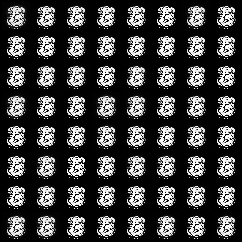



[2/50][0/60000]	Loss_D: 2.9530	Loss_G: 436.7870	D(x): 0.9890	D(G(z)): 0.0165 / 0.0060
[2/50][6400/60000]	Loss_D: 7.8328	Loss_G: 541.7861	D(x): 0.9639	D(G(z)): 0.0239 / 0.0086
[2/50][12800/60000]	Loss_D: 0.7673	Loss_G: 440.7155	D(x): 0.9952	D(G(z)): 0.0021 / 0.0015
[2/50][19200/60000]	Loss_D: 1.5867	Loss_G: 347.5155	D(x): 0.9917	D(G(z)): 0.0077 / 0.0052
[2/50][25600/60000]	Loss_D: 0.8648	Loss_G: 514.1813	D(x): 0.9944	D(G(z)): 0.0021 / 0.0012
[2/50][32000/60000]	Loss_D: 1.3892	Loss_G: 386.5813	D(x): 0.9922	D(G(z)): 0.0058 / 0.0038
[2/50][38400/60000]	Loss_D: 2.7217	Loss_G: 369.6578	D(x): 0.9853	D(G(z)): 0.0079 / 0.0054
[2/50][44800/60000]	Loss_D: 1.2912	Loss_G: 408.2352	D(x): 0.9935	D(G(z)): 0.0060 / 0.0030
[2/50][51200/60000]	Loss_D: 2.4375	Loss_G: 426.6326	D(x): 0.9911	D(G(z)): 0.0128 / 0.0055
[2/50][57600/60000]	Loss_D: 1.0239	Loss_G: 450.5121	D(x): 0.9968	D(G(z)): 0.0091 / 0.0040
====> Epoch: 2 Average generator loss: 3.1793 Average discriminator loss: 0.0220
====> Epoch: 2 Test Av

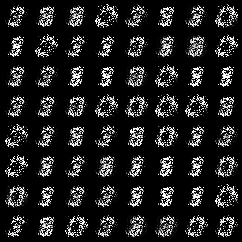



[3/50][0/60000]	Loss_D: 1.1536	Loss_G: 468.2624	D(x): 0.9948	D(G(z)): 0.0073 / 0.0034
[3/50][6400/60000]	Loss_D: 1.2558	Loss_G: 359.4688	D(x): 0.9980	D(G(z)): 0.0151 / 0.0066
[3/50][12800/60000]	Loss_D: 1.2758	Loss_G: 407.3088	D(x): 0.9965	D(G(z)): 0.0120 / 0.0040
[3/50][19200/60000]	Loss_D: 0.7222	Loss_G: 490.5846	D(x): 0.9977	D(G(z)): 0.0064 / 0.0023
[3/50][25600/60000]	Loss_D: 1.0580	Loss_G: 527.5170	D(x): 0.9965	D(G(z)): 0.0090 / 0.0047
[3/50][32000/60000]	Loss_D: 0.7540	Loss_G: 569.5848	D(x): 0.9975	D(G(z)): 0.0058 / 0.0035
[3/50][38400/60000]	Loss_D: 0.6371	Loss_G: 425.7672	D(x): 0.9994	D(G(z)): 0.0086 / 0.0044
[3/50][44800/60000]	Loss_D: 0.5565	Loss_G: 500.4567	D(x): 0.9969	D(G(z)): 0.0024 / 0.0017
[3/50][51200/60000]	Loss_D: 0.1463	Loss_G: 515.4901	D(x): 0.9993	D(G(z)): 0.0009 / 0.0006
[3/50][57600/60000]	Loss_D: 1.1758	Loss_G: 609.2814	D(x): 0.9956	D(G(z)): 0.0075 / 0.0050
====> Epoch: 3 Average generator loss: 3.7011 Average discriminator loss: 0.0090
====> Epoch: 3 Test Av

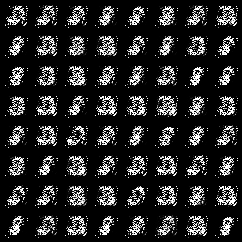



[4/50][0/60000]	Loss_D: 0.1695	Loss_G: 699.5651	D(x): 0.9990	D(G(z)): 0.0006 / 0.0004
[4/50][6400/60000]	Loss_D: 0.2132	Loss_G: 748.8051	D(x): 0.9986	D(G(z)): 0.0005 / 0.0005
[4/50][12800/60000]	Loss_D: 1.2789	Loss_G: 416.5909	D(x): 0.9932	D(G(z)): 0.0041 / 0.0043
[4/50][19200/60000]	Loss_D: 2.2624	Loss_G: 303.9192	D(x): 0.9942	D(G(z)): 0.0218 / 0.0178
[4/50][25600/60000]	Loss_D: 2.7724	Loss_G: 449.1240	D(x): 0.9933	D(G(z)): 0.0194 / 0.0103
[4/50][32000/60000]	Loss_D: 3.1510	Loss_G: 407.5842	D(x): 0.9887	D(G(z)): 0.0162 / 0.0076
[4/50][38400/60000]	Loss_D: 4.1855	Loss_G: 380.9096	D(x): 0.9914	D(G(z)): 0.0384 / 0.0110
[4/50][44800/60000]	Loss_D: 2.5272	Loss_G: 463.1830	D(x): 0.9927	D(G(z)): 0.0186 / 0.0056
[4/50][51200/60000]	Loss_D: 0.9373	Loss_G: 443.5575	D(x): 0.9958	D(G(z)): 0.0057 / 0.0034
[4/50][57600/60000]	Loss_D: 0.5055	Loss_G: 475.2911	D(x): 0.9979	D(G(z)): 0.0035 / 0.0023
====> Epoch: 4 Average generator loss: 3.7055 Average discriminator loss: 0.0139
====> Epoch: 4 Test Av

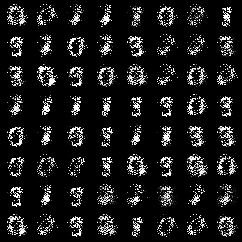



[5/50][0/60000]	Loss_D: 0.6285	Loss_G: 426.6796	D(x): 0.9992	D(G(z)): 0.0079 / 0.0046
[5/50][6400/60000]	Loss_D: 0.9221	Loss_G: 444.3199	D(x): 0.9960	D(G(z)): 0.0055 / 0.0042
[5/50][12800/60000]	Loss_D: 1.0195	Loss_G: 395.7143	D(x): 0.9965	D(G(z)): 0.0083 / 0.0061
[5/50][19200/60000]	Loss_D: 0.8197	Loss_G: 392.0548	D(x): 0.9982	D(G(z)): 0.0091 / 0.0060
[5/50][25600/60000]	Loss_D: 3.8084	Loss_G: 365.8484	D(x): 0.9875	D(G(z)): 0.0269 / 0.0147
[5/50][32000/60000]	Loss_D: 1.1741	Loss_G: 395.5536	D(x): 0.9961	D(G(z)): 0.0099 / 0.0055
[5/50][38400/60000]	Loss_D: 3.0832	Loss_G: 390.3313	D(x): 0.9878	D(G(z)): 0.0160 / 0.0091
[5/50][44800/60000]	Loss_D: 0.7652	Loss_G: 438.5323	D(x): 0.9971	D(G(z)): 0.0059 / 0.0035
[5/50][51200/60000]	Loss_D: 1.0206	Loss_G: 403.6193	D(x): 0.9976	D(G(z)): 0.0108 / 0.0065
[5/50][57600/60000]	Loss_D: 0.6991	Loss_G: 407.9052	D(x): 0.9987	D(G(z)): 0.0081 / 0.0046
====> Epoch: 5 Average generator loss: 3.2611 Average discriminator loss: 0.0118
====> Epoch: 5 Test Av

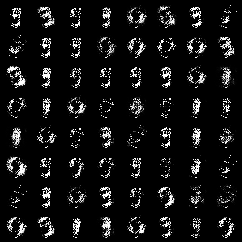



[6/50][0/60000]	Loss_D: 0.8247	Loss_G: 408.9765	D(x): 0.9984	D(G(z)): 0.0092 / 0.0058
[6/50][6400/60000]	Loss_D: 0.7724	Loss_G: 455.3064	D(x): 0.9980	D(G(z)): 0.0074 / 0.0045
[6/50][12800/60000]	Loss_D: 0.6730	Loss_G: 411.1625	D(x): 0.9986	D(G(z)): 0.0073 / 0.0047
[6/50][19200/60000]	Loss_D: 0.2872	Loss_G: 523.0267	D(x): 0.9987	D(G(z)): 0.0019 / 0.0010
[6/50][25600/60000]	Loss_D: 0.0688	Loss_G: 557.3663	D(x): 0.9998	D(G(z)): 0.0006 / 0.0004
[6/50][32000/60000]	Loss_D: 0.2925	Loss_G: 584.4913	D(x): 0.9982	D(G(z)): 0.0008 / 0.0003
[6/50][38400/60000]	Loss_D: 0.1270	Loss_G: 823.7155	D(x): 0.9993	D(G(z)): 0.0005 / 0.0003
[6/50][44800/60000]	Loss_D: 0.2377	Loss_G: 614.8158	D(x): 0.9988	D(G(z)): 0.0012 / 0.0012
[6/50][51200/60000]	Loss_D: 0.0686	Loss_G: 607.0427	D(x): 0.9996	D(G(z)): 0.0003 / 0.0003
[6/50][57600/60000]	Loss_D: 0.5385	Loss_G: 640.1874	D(x): 0.9966	D(G(z)): 0.0014 / 0.0007
====> Epoch: 6 Average generator loss: 4.2896 Average discriminator loss: 0.0048
====> Epoch: 6 Test Av

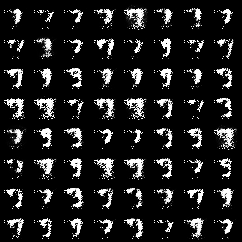



[7/50][0/60000]	Loss_D: 1.4463	Loss_G: 601.4362	D(x): 0.9922	D(G(z)): 0.0019 / 0.0004
[7/50][6400/60000]	Loss_D: 0.9519	Loss_G: 421.3550	D(x): 0.9990	D(G(z)): 0.0124 / 0.0054
[7/50][12800/60000]	Loss_D: 4.4256	Loss_G: 512.6992	D(x): 0.9942	D(G(z)): 0.0402 / 0.0092
[7/50][19200/60000]	Loss_D: 1.5495	Loss_G: 501.1317	D(x): 0.9964	D(G(z)): 0.0136 / 0.0041
[7/50][25600/60000]	Loss_D: 1.1311	Loss_G: 529.3949	D(x): 0.9956	D(G(z)): 0.0070 / 0.0028
[7/50][32000/60000]	Loss_D: 0.3995	Loss_G: 470.4069	D(x): 0.9998	D(G(z)): 0.0056 / 0.0041
[7/50][38400/60000]	Loss_D: 1.0615	Loss_G: 682.3074	D(x): 0.9928	D(G(z)): 0.0005 / 0.0002
[7/50][44800/60000]	Loss_D: 0.7420	Loss_G: 558.2159	D(x): 0.9972	D(G(z)): 0.0056 / 0.0029
[7/50][51200/60000]	Loss_D: 0.8536	Loss_G: 478.5407	D(x): 0.9969	D(G(z)): 0.0063 / 0.0032
[7/50][57600/60000]	Loss_D: 3.8671	Loss_G: 485.6371	D(x): 0.9935	D(G(z)): 0.0190 / 0.0138
====> Epoch: 7 Average generator loss: 4.0863 Average discriminator loss: 0.0121
====> Epoch: 7 Test Av

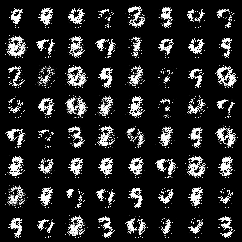



[8/50][0/60000]	Loss_D: 0.8491	Loss_G: 589.5588	D(x): 0.9962	D(G(z)): 0.0049 / 0.0013
[8/50][6400/60000]	Loss_D: 2.6631	Loss_G: 429.9220	D(x): 0.9906	D(G(z)): 0.0107 / 0.0185
[8/50][12800/60000]	Loss_D: 0.4466	Loss_G: 618.7930	D(x): 0.9981	D(G(z)): 0.0029 / 0.0007
[8/50][19200/60000]	Loss_D: 1.2683	Loss_G: 513.2062	D(x): 0.9951	D(G(z)): 0.0085 / 0.0066
[8/50][25600/60000]	Loss_D: 6.5870	Loss_G: 444.3654	D(x): 0.9946	D(G(z)): 0.0296 / 0.0232
[8/50][32000/60000]	Loss_D: 3.6449	Loss_G: 477.4961	D(x): 0.9901	D(G(z)): 0.0191 / 0.0146
[8/50][38400/60000]	Loss_D: 3.1644	Loss_G: 399.7604	D(x): 0.9892	D(G(z)): 0.0214 / 0.0169
[8/50][44800/60000]	Loss_D: 0.7965	Loss_G: 529.0646	D(x): 0.9972	D(G(z)): 0.0064 / 0.0026
[8/50][51200/60000]	Loss_D: 0.8844	Loss_G: 459.8875	D(x): 0.9960	D(G(z)): 0.0054 / 0.0040
[8/50][57600/60000]	Loss_D: 0.7572	Loss_G: 462.6093	D(x): 0.9967	D(G(z)): 0.0050 / 0.0031
====> Epoch: 8 Average generator loss: 3.8535 Average discriminator loss: 0.0176
====> Epoch: 8 Test Av

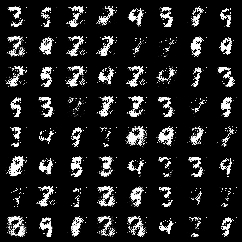



[9/50][0/60000]	Loss_D: 1.5435	Loss_G: 409.9620	D(x): 0.9943	D(G(z)): 0.0113 / 0.0080
[9/50][6400/60000]	Loss_D: 1.4399	Loss_G: 391.3226	D(x): 0.9950	D(G(z)): 0.0111 / 0.0104
[9/50][12800/60000]	Loss_D: 3.3956	Loss_G: 546.2643	D(x): 0.9849	D(G(z)): 0.0054 / 0.0028
[9/50][19200/60000]	Loss_D: 1.5011	Loss_G: 398.9773	D(x): 0.9965	D(G(z)): 0.0141 / 0.0080
[9/50][25600/60000]	Loss_D: 17.0249	Loss_G: 477.8075	D(x): 0.9482	D(G(z)): 0.0110 / 0.0115
[9/50][32000/60000]	Loss_D: 1.0745	Loss_G: 472.0715	D(x): 0.9949	D(G(z)): 0.0061 / 0.0041
[9/50][38400/60000]	Loss_D: 6.5621	Loss_G: 402.8216	D(x): 0.9747	D(G(z)): 0.0051 / 0.0100
[9/50][44800/60000]	Loss_D: 5.1304	Loss_G: 425.6845	D(x): 0.9874	D(G(z)): 0.0127 / 0.0071
[9/50][51200/60000]	Loss_D: 4.4056	Loss_G: 496.2741	D(x): 0.9814	D(G(z)): 0.0068 / 0.0059
[9/50][57600/60000]	Loss_D: 2.7971	Loss_G: 339.3621	D(x): 0.9948	D(G(z)): 0.0298 / 0.0260
====> Epoch: 9 Average generator loss: 3.3819 Average discriminator loss: 0.0251
====> Epoch: 9 Test A

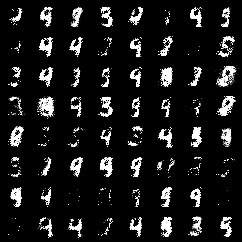



[10/50][0/60000]	Loss_D: 2.6309	Loss_G: 444.4706	D(x): 0.9877	D(G(z)): 0.0051 / 0.0063
[10/50][6400/60000]	Loss_D: 3.3131	Loss_G: 412.6165	D(x): 0.9910	D(G(z)): 0.0255 / 0.0161
[10/50][12800/60000]	Loss_D: 3.0738	Loss_G: 384.6970	D(x): 0.9964	D(G(z)): 0.0341 / 0.0182
[10/50][19200/60000]	Loss_D: 3.5928	Loss_G: 442.1897	D(x): 0.9857	D(G(z)): 0.0132 / 0.0096
[10/50][25600/60000]	Loss_D: 2.5766	Loss_G: 452.0036	D(x): 0.9938	D(G(z)): 0.0235 / 0.0163
[10/50][32000/60000]	Loss_D: 5.4284	Loss_G: 356.2645	D(x): 0.9829	D(G(z)): 0.0268 / 0.0177
[10/50][38400/60000]	Loss_D: 9.0946	Loss_G: 373.2439	D(x): 0.9750	D(G(z)): 0.0463 / 0.0341
[10/50][44800/60000]	Loss_D: 5.2967	Loss_G: 378.0649	D(x): 0.9896	D(G(z)): 0.0430 / 0.0265
[10/50][51200/60000]	Loss_D: 4.0565	Loss_G: 425.5535	D(x): 0.9868	D(G(z)): 0.0227 / 0.0142
[10/50][57600/60000]	Loss_D: 4.5275	Loss_G: 376.0492	D(x): 0.9850	D(G(z)): 0.0275 / 0.0261
====> Epoch: 10 Average generator loss: 3.2642 Average discriminator loss: 0.0362
====> Epoch

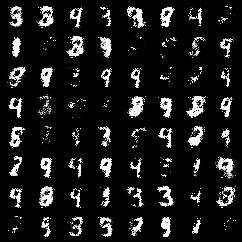



[11/50][0/60000]	Loss_D: 13.8962	Loss_G: 392.5136	D(x): 0.9946	D(G(z)): 0.1171 / 0.0322
[11/50][6400/60000]	Loss_D: 11.6803	Loss_G: 332.6982	D(x): 0.9794	D(G(z)): 0.0645 / 0.0419
[11/50][12800/60000]	Loss_D: 3.6721	Loss_G: 457.6389	D(x): 0.9832	D(G(z)): 0.0118 / 0.0070
[11/50][19200/60000]	Loss_D: 3.6814	Loss_G: 412.9833	D(x): 0.9894	D(G(z)): 0.0266 / 0.0138
[11/50][25600/60000]	Loss_D: 5.4025	Loss_G: 405.1533	D(x): 0.9891	D(G(z)): 0.0341 / 0.0144
[11/50][32000/60000]	Loss_D: 5.6753	Loss_G: 459.2796	D(x): 0.9869	D(G(z)): 0.0367 / 0.0144
[11/50][38400/60000]	Loss_D: 6.0039	Loss_G: 476.2325	D(x): 0.9810	D(G(z)): 0.0111 / 0.0098
[11/50][44800/60000]	Loss_D: 3.7704	Loss_G: 428.2258	D(x): 0.9917	D(G(z)): 0.0348 / 0.0154
[11/50][51200/60000]	Loss_D: 14.1422	Loss_G: 321.6479	D(x): 0.9848	D(G(z)): 0.1006 / 0.0601
[11/50][57600/60000]	Loss_D: 5.5557	Loss_G: 549.1608	D(x): 0.9692	D(G(z)): 0.0040 / 0.0019
====> Epoch: 11 Average generator loss: 3.3773 Average discriminator loss: 0.0490
====> Ep

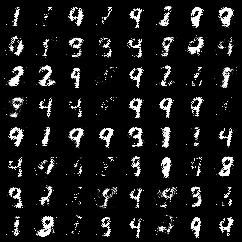



[12/50][0/60000]	Loss_D: 7.8956	Loss_G: 511.0150	D(x): 0.9677	D(G(z)): 0.0085 / 0.0030
[12/50][6400/60000]	Loss_D: 2.4654	Loss_G: 509.1381	D(x): 0.9883	D(G(z)): 0.0110 / 0.0098
[12/50][12800/60000]	Loss_D: 7.1569	Loss_G: 439.9221	D(x): 0.9737	D(G(z)): 0.0359 / 0.0317
[12/50][19200/60000]	Loss_D: 6.4436	Loss_G: 390.5215	D(x): 0.9752	D(G(z)): 0.0171 / 0.0200
[12/50][25600/60000]	Loss_D: 2.7793	Loss_G: 447.4922	D(x): 0.9876	D(G(z)): 0.0155 / 0.0071
[12/50][32000/60000]	Loss_D: 3.9982	Loss_G: 508.5071	D(x): 0.9859	D(G(z)): 0.0137 / 0.0055
[12/50][38400/60000]	Loss_D: 4.9279	Loss_G: 402.7173	D(x): 0.9840	D(G(z)): 0.0206 / 0.0105
[12/50][44800/60000]	Loss_D: 9.7733	Loss_G: 379.4739	D(x): 0.9885	D(G(z)): 0.0733 / 0.0489
[12/50][51200/60000]	Loss_D: 6.7666	Loss_G: 433.8104	D(x): 0.9830	D(G(z)): 0.0223 / 0.0192
[12/50][57600/60000]	Loss_D: 12.0994	Loss_G: 457.7697	D(x): 0.9655	D(G(z)): 0.0417 / 0.0239
====> Epoch: 12 Average generator loss: 3.3469 Average discriminator loss: 0.0577
====> Epoc

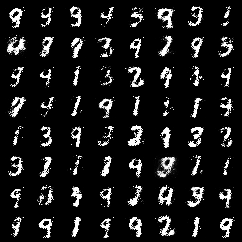



[13/50][0/60000]	Loss_D: 11.0191	Loss_G: 510.6660	D(x): 0.9634	D(G(z)): 0.0136 / 0.0063
[13/50][6400/60000]	Loss_D: 9.4098	Loss_G: 453.0369	D(x): 0.9871	D(G(z)): 0.0684 / 0.0200
[13/50][12800/60000]	Loss_D: 7.6106	Loss_G: 356.0142	D(x): 0.9837	D(G(z)): 0.0632 / 0.0409
[13/50][19200/60000]	Loss_D: 19.7672	Loss_G: 419.7409	D(x): 0.9349	D(G(z)): 0.0241 / 0.0255
[13/50][25600/60000]	Loss_D: 13.4511	Loss_G: 447.4327	D(x): 0.9583	D(G(z)): 0.0148 / 0.0122
[13/50][32000/60000]	Loss_D: 11.3628	Loss_G: 290.8747	D(x): 0.9905	D(G(z)): 0.1155 / 0.0670
[13/50][38400/60000]	Loss_D: 20.8694	Loss_G: 284.5511	D(x): 0.9615	D(G(z)): 0.1255 / 0.1177
[13/50][44800/60000]	Loss_D: 11.4148	Loss_G: 379.1909	D(x): 0.9778	D(G(z)): 0.0826 / 0.0250
[13/50][51200/60000]	Loss_D: 10.4140	Loss_G: 428.4956	D(x): 0.9645	D(G(z)): 0.0276 / 0.0246
[13/50][57600/60000]	Loss_D: 20.9502	Loss_G: 331.0341	D(x): 0.9769	D(G(z)): 0.1377 / 0.0721
====> Epoch: 13 Average generator loss: 3.0550 Average discriminator loss: 0.0835
===

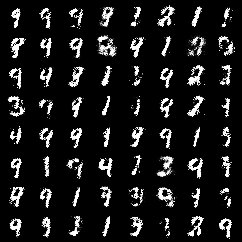



[14/50][0/60000]	Loss_D: 8.7876	Loss_G: 330.4269	D(x): 0.9728	D(G(z)): 0.0406 / 0.0433
[14/50][6400/60000]	Loss_D: 7.8226	Loss_G: 428.3010	D(x): 0.9709	D(G(z)): 0.0432 / 0.0198
[14/50][12800/60000]	Loss_D: 21.9540	Loss_G: 299.1407	D(x): 0.9731	D(G(z)): 0.1444 / 0.0715
[14/50][19200/60000]	Loss_D: 13.3230	Loss_G: 271.9961	D(x): 0.9769	D(G(z)): 0.0842 / 0.0821
[14/50][25600/60000]	Loss_D: 21.6866	Loss_G: 303.3837	D(x): 0.9461	D(G(z)): 0.0848 / 0.0614
[14/50][32000/60000]	Loss_D: 13.7496	Loss_G: 332.6561	D(x): 0.9863	D(G(z)): 0.1094 / 0.0601
[14/50][38400/60000]	Loss_D: 12.6017	Loss_G: 325.0611	D(x): 0.9695	D(G(z)): 0.0704 / 0.0636
[14/50][44800/60000]	Loss_D: 14.6248	Loss_G: 363.3799	D(x): 0.9501	D(G(z)): 0.0396 / 0.0343
[14/50][51200/60000]	Loss_D: 16.7223	Loss_G: 357.5884	D(x): 0.9646	D(G(z)): 0.0654 / 0.0498
[14/50][57600/60000]	Loss_D: 25.4516	Loss_G: 292.1520	D(x): 0.9193	D(G(z)): 0.0540 / 0.0730
====> Epoch: 14 Average generator loss: 2.7048 Average discriminator loss: 0.0924
===

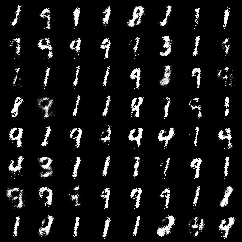



[15/50][0/60000]	Loss_D: 11.4236	Loss_G: 397.1795	D(x): 0.9583	D(G(z)): 0.0181 / 0.0145
[15/50][6400/60000]	Loss_D: 26.0826	Loss_G: 328.8162	D(x): 0.9714	D(G(z)): 0.1130 / 0.0769
[15/50][12800/60000]	Loss_D: 12.4559	Loss_G: 287.4417	D(x): 0.9667	D(G(z)): 0.0815 / 0.0540
[15/50][19200/60000]	Loss_D: 14.8328	Loss_G: 237.4635	D(x): 0.9876	D(G(z)): 0.1428 / 0.0970
[15/50][25600/60000]	Loss_D: 19.9645	Loss_G: 381.3765	D(x): 0.9352	D(G(z)): 0.0321 / 0.0293
[15/50][32000/60000]	Loss_D: 6.9681	Loss_G: 330.4829	D(x): 0.9901	D(G(z)): 0.0704 / 0.0306
[15/50][38400/60000]	Loss_D: 21.6329	Loss_G: 282.7537	D(x): 0.9516	D(G(z)): 0.0986 / 0.0799
[15/50][44800/60000]	Loss_D: 28.1674	Loss_G: 326.3385	D(x): 0.9117	D(G(z)): 0.0577 / 0.0614
[15/50][51200/60000]	Loss_D: 14.4761	Loss_G: 359.0075	D(x): 0.9525	D(G(z)): 0.0549 / 0.0330
[15/50][57600/60000]	Loss_D: 19.5821	Loss_G: 303.7439	D(x): 0.9312	D(G(z)): 0.0487 / 0.0571
====> Epoch: 15 Average generator loss: 2.4322 Average discriminator loss: 0.1261
==

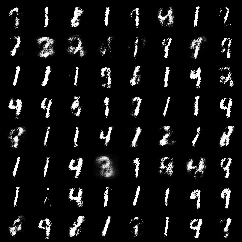



[16/50][0/60000]	Loss_D: 26.0315	Loss_G: 319.0875	D(x): 0.9154	D(G(z)): 0.0297 / 0.0386
[16/50][6400/60000]	Loss_D: 22.2535	Loss_G: 326.1865	D(x): 0.9363	D(G(z)): 0.0644 / 0.0401
[16/50][12800/60000]	Loss_D: 24.2510	Loss_G: 256.6154	D(x): 0.9390	D(G(z)): 0.1142 / 0.0867
[16/50][19200/60000]	Loss_D: 29.6345	Loss_G: 244.4401	D(x): 0.9036	D(G(z)): 0.0656 / 0.0801
[16/50][25600/60000]	Loss_D: 20.6085	Loss_G: 343.7500	D(x): 0.9409	D(G(z)): 0.0905 / 0.0469
[16/50][32000/60000]	Loss_D: 33.5951	Loss_G: 259.9769	D(x): 0.9134	D(G(z)): 0.1336 / 0.0875
[16/50][38400/60000]	Loss_D: 15.1491	Loss_G: 259.3421	D(x): 0.9641	D(G(z)): 0.0970 / 0.0625
[16/50][44800/60000]	Loss_D: 22.8677	Loss_G: 233.5042	D(x): 0.9463	D(G(z)): 0.1503 / 0.1031
[16/50][51200/60000]	Loss_D: 22.5697	Loss_G: 314.0087	D(x): 0.9477	D(G(z)): 0.1132 / 0.0598
[16/50][57600/60000]	Loss_D: 37.6772	Loss_G: 251.2843	D(x): 0.9228	D(G(z)): 0.1484 / 0.1118
====> Epoch: 16 Average generator loss: 2.0582 Average discriminator loss: 0.1752
=

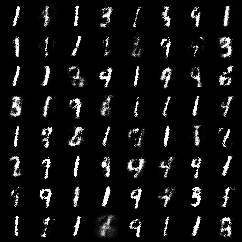



[17/50][0/60000]	Loss_D: 20.0795	Loss_G: 263.1451	D(x): 0.9384	D(G(z)): 0.0957 / 0.0711
[17/50][6400/60000]	Loss_D: 24.3974	Loss_G: 338.2656	D(x): 0.9529	D(G(z)): 0.0905 / 0.0586
[17/50][12800/60000]	Loss_D: 24.5481	Loss_G: 247.3142	D(x): 0.9488	D(G(z)): 0.1309 / 0.0941
[17/50][19200/60000]	Loss_D: 18.4679	Loss_G: 307.7211	D(x): 0.9647	D(G(z)): 0.0939 / 0.0653
[17/50][25600/60000]	Loss_D: 17.4399	Loss_G: 257.8862	D(x): 0.9685	D(G(z)): 0.1361 / 0.0817
[17/50][32000/60000]	Loss_D: 35.6061	Loss_G: 260.8327	D(x): 0.8895	D(G(z)): 0.0944 / 0.0811
[17/50][38400/60000]	Loss_D: 35.5886	Loss_G: 227.5355	D(x): 0.9316	D(G(z)): 0.1763 / 0.1320
[17/50][44800/60000]	Loss_D: 36.3252	Loss_G: 205.0582	D(x): 0.9637	D(G(z)): 0.2598 / 0.1436
[17/50][51200/60000]	Loss_D: 22.6383	Loss_G: 269.5837	D(x): 0.9523	D(G(z)): 0.1469 / 0.1134
[17/50][57600/60000]	Loss_D: 19.4596	Loss_G: 266.9821	D(x): 0.9576	D(G(z)): 0.1300 / 0.0659
====> Epoch: 17 Average generator loss: 1.9581 Average discriminator loss: 0.1962
=

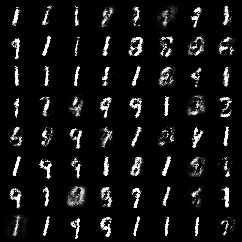



[18/50][0/60000]	Loss_D: 29.1896	Loss_G: 259.1472	D(x): 0.9242	D(G(z)): 0.1426 / 0.0872
[18/50][6400/60000]	Loss_D: 23.1763	Loss_G: 227.2002	D(x): 0.9585	D(G(z)): 0.1395 / 0.1343
[18/50][12800/60000]	Loss_D: 20.1265	Loss_G: 269.8322	D(x): 0.9578	D(G(z)): 0.1081 / 0.0918
[18/50][19200/60000]	Loss_D: 16.7765	Loss_G: 271.6157	D(x): 0.9516	D(G(z)): 0.0747 / 0.0677
[18/50][25600/60000]	Loss_D: 33.9884	Loss_G: 276.9869	D(x): 0.9113	D(G(z)): 0.1156 / 0.0644
[18/50][32000/60000]	Loss_D: 24.6588	Loss_G: 204.1218	D(x): 0.9796	D(G(z)): 0.2232 / 0.1128
[18/50][38400/60000]	Loss_D: 21.1815	Loss_G: 314.7369	D(x): 0.9385	D(G(z)): 0.0650 / 0.0458
[18/50][44800/60000]	Loss_D: 41.5245	Loss_G: 273.0391	D(x): 0.8837	D(G(z)): 0.0895 / 0.0728
[18/50][51200/60000]	Loss_D: 17.8125	Loss_G: 239.8495	D(x): 0.9569	D(G(z)): 0.1316 / 0.0705
[18/50][57600/60000]	Loss_D: 35.1306	Loss_G: 286.1566	D(x): 0.9319	D(G(z)): 0.1520 / 0.0917
====> Epoch: 18 Average generator loss: 1.9363 Average discriminator loss: 0.2273
=

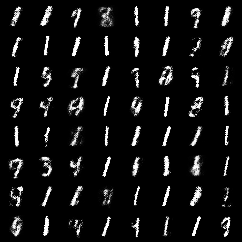



[19/50][0/60000]	Loss_D: 15.6039	Loss_G: 314.4823	D(x): 0.9504	D(G(z)): 0.0572 / 0.0349
[19/50][6400/60000]	Loss_D: 20.9723	Loss_G: 251.8697	D(x): 0.9393	D(G(z)): 0.0982 / 0.0751
[19/50][12800/60000]	Loss_D: 43.8878	Loss_G: 211.5051	D(x): 0.9068	D(G(z)): 0.1747 / 0.1434
[19/50][19200/60000]	Loss_D: 26.1116	Loss_G: 233.0750	D(x): 0.9255	D(G(z)): 0.1053 / 0.0809
[19/50][25600/60000]	Loss_D: 26.8288	Loss_G: 208.1119	D(x): 0.9409	D(G(z)): 0.1605 / 0.1265
[19/50][32000/60000]	Loss_D: 25.0641	Loss_G: 239.3799	D(x): 0.9348	D(G(z)): 0.1035 / 0.0874
[19/50][38400/60000]	Loss_D: 41.7856	Loss_G: 205.4037	D(x): 0.9327	D(G(z)): 0.2166 / 0.1735
[19/50][44800/60000]	Loss_D: 38.8837	Loss_G: 223.1569	D(x): 0.9198	D(G(z)): 0.1559 / 0.1045
[19/50][51200/60000]	Loss_D: 28.0110	Loss_G: 227.9803	D(x): 0.9173	D(G(z)): 0.1103 / 0.0758
[19/50][57600/60000]	Loss_D: 19.4759	Loss_G: 258.8029	D(x): 0.9558	D(G(z)): 0.1351 / 0.0589
====> Epoch: 19 Average generator loss: 1.8105 Average discriminator loss: 0.2433
=

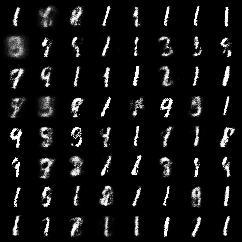



[20/50][0/60000]	Loss_D: 28.1623	Loss_G: 275.2980	D(x): 0.9184	D(G(z)): 0.1079 / 0.0501
[20/50][6400/60000]	Loss_D: 31.8522	Loss_G: 179.8489	D(x): 0.9369	D(G(z)): 0.1769 / 0.1500
[20/50][12800/60000]	Loss_D: 32.3545	Loss_G: 246.5588	D(x): 0.9064	D(G(z)): 0.0863 / 0.0803
[20/50][19200/60000]	Loss_D: 39.6883	Loss_G: 206.3941	D(x): 0.8814	D(G(z)): 0.1133 / 0.1172
[20/50][25600/60000]	Loss_D: 29.3564	Loss_G: 231.0269	D(x): 0.9179	D(G(z)): 0.1155 / 0.0782
[20/50][32000/60000]	Loss_D: 36.5849	Loss_G: 205.1487	D(x): 0.9136	D(G(z)): 0.1506 / 0.1365
[20/50][38400/60000]	Loss_D: 28.1391	Loss_G: 161.5108	D(x): 0.9364	D(G(z)): 0.1737 / 0.1731
[20/50][44800/60000]	Loss_D: 25.8211	Loss_G: 179.9689	D(x): 0.9636	D(G(z)): 0.2160 / 0.1395
[20/50][51200/60000]	Loss_D: 33.7014	Loss_G: 192.2889	D(x): 0.9379	D(G(z)): 0.1916 / 0.1649
[20/50][57600/60000]	Loss_D: 28.8618	Loss_G: 242.2981	D(x): 0.9360	D(G(z)): 0.1498 / 0.0717
====> Epoch: 20 Average generator loss: 1.6472 Average discriminator loss: 0.2644
=

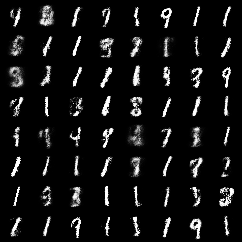



[21/50][0/60000]	Loss_D: 27.0352	Loss_G: 207.7769	D(x): 0.9484	D(G(z)): 0.1517 / 0.1008
[21/50][6400/60000]	Loss_D: 40.2286	Loss_G: 175.2470	D(x): 0.9424	D(G(z)): 0.2066 / 0.1752
[21/50][12800/60000]	Loss_D: 23.5984	Loss_G: 264.1866	D(x): 0.9551	D(G(z)): 0.1219 / 0.0821
[21/50][19200/60000]	Loss_D: 40.7289	Loss_G: 192.5490	D(x): 0.8934	D(G(z)): 0.1507 / 0.1206
[21/50][25600/60000]	Loss_D: 40.8827	Loss_G: 149.4514	D(x): 0.9085	D(G(z)): 0.2101 / 0.2107
[21/50][32000/60000]	Loss_D: 39.5329	Loss_G: 162.0390	D(x): 0.9185	D(G(z)): 0.1808 / 0.1946
[21/50][38400/60000]	Loss_D: 37.9874	Loss_G: 217.5916	D(x): 0.9010	D(G(z)): 0.1090 / 0.1024
[21/50][44800/60000]	Loss_D: 26.6752	Loss_G: 167.4993	D(x): 0.9350	D(G(z)): 0.1416 / 0.1726
[21/50][51200/60000]	Loss_D: 27.8057	Loss_G: 232.4031	D(x): 0.9359	D(G(z)): 0.1699 / 0.0987
[21/50][57600/60000]	Loss_D: 32.7048	Loss_G: 211.6533	D(x): 0.9133	D(G(z)): 0.1474 / 0.1066
====> Epoch: 21 Average generator loss: 1.5844 Average discriminator loss: 0.2818
=

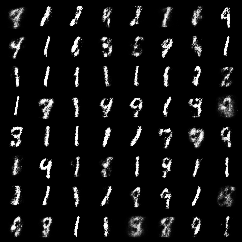



[22/50][0/60000]	Loss_D: 28.7122	Loss_G: 207.0428	D(x): 0.9205	D(G(z)): 0.1271 / 0.0961
[22/50][6400/60000]	Loss_D: 34.2045	Loss_G: 206.0193	D(x): 0.9185	D(G(z)): 0.1484 / 0.1174
[22/50][12800/60000]	Loss_D: 35.8151	Loss_G: 214.9961	D(x): 0.9083	D(G(z)): 0.1769 / 0.1480
[22/50][19200/60000]	Loss_D: 37.9918	Loss_G: 234.7490	D(x): 0.8982	D(G(z)): 0.1229 / 0.0944
[22/50][25600/60000]	Loss_D: 36.1884	Loss_G: 175.1198	D(x): 0.9289	D(G(z)): 0.2079 / 0.1853
[22/50][32000/60000]	Loss_D: 37.3880	Loss_G: 195.6110	D(x): 0.9160	D(G(z)): 0.1609 / 0.1455
[22/50][38400/60000]	Loss_D: 52.7341	Loss_G: 218.0003	D(x): 0.8808	D(G(z)): 0.1089 / 0.1153
[22/50][44800/60000]	Loss_D: 39.9429	Loss_G: 235.3229	D(x): 0.9270	D(G(z)): 0.2181 / 0.1414
[22/50][51200/60000]	Loss_D: 44.6607	Loss_G: 185.4401	D(x): 0.9107	D(G(z)): 0.2140 / 0.1639
[22/50][57600/60000]	Loss_D: 23.2230	Loss_G: 245.0013	D(x): 0.9518	D(G(z)): 0.1037 / 0.0891
====> Epoch: 22 Average generator loss: 1.5880 Average discriminator loss: 0.3001
=

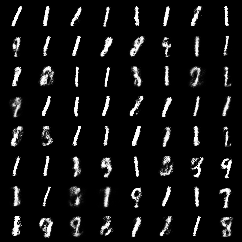



[23/50][0/60000]	Loss_D: 31.6039	Loss_G: 252.3773	D(x): 0.9391	D(G(z)): 0.1345 / 0.0701
[23/50][6400/60000]	Loss_D: 38.9791	Loss_G: 192.1431	D(x): 0.9113	D(G(z)): 0.1670 / 0.1636
[23/50][12800/60000]	Loss_D: 26.3327	Loss_G: 214.3361	D(x): 0.9278	D(G(z)): 0.1241 / 0.1023
[23/50][19200/60000]	Loss_D: 47.7347	Loss_G: 187.6356	D(x): 0.8762	D(G(z)): 0.1612 / 0.1273
[23/50][25600/60000]	Loss_D: 48.9042	Loss_G: 149.3579	D(x): 0.8860	D(G(z)): 0.2273 / 0.2065
[23/50][32000/60000]	Loss_D: 31.5386	Loss_G: 134.6289	D(x): 0.9591	D(G(z)): 0.2406 / 0.2310
[23/50][38400/60000]	Loss_D: 27.0119	Loss_G: 188.4844	D(x): 0.9489	D(G(z)): 0.1724 / 0.1359
[23/50][44800/60000]	Loss_D: 43.0073	Loss_G: 181.2836	D(x): 0.9159	D(G(z)): 0.1772 / 0.1594
[23/50][51200/60000]	Loss_D: 33.3665	Loss_G: 152.2624	D(x): 0.9423	D(G(z)): 0.2362 / 0.1877
[23/50][57600/60000]	Loss_D: 42.0490	Loss_G: 157.5833	D(x): 0.9358	D(G(z)): 0.2550 / 0.1969
====> Epoch: 23 Average generator loss: 1.4401 Average discriminator loss: 0.3080
=

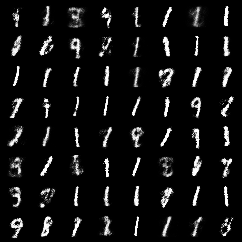



[24/50][0/60000]	Loss_D: 31.2255	Loss_G: 145.1043	D(x): 0.9302	D(G(z)): 0.1990 / 0.1985
[24/50][6400/60000]	Loss_D: 40.2323	Loss_G: 197.3257	D(x): 0.8974	D(G(z)): 0.1430 / 0.1351
[24/50][12800/60000]	Loss_D: 30.3797	Loss_G: 184.0532	D(x): 0.9421	D(G(z)): 0.1954 / 0.1499
[24/50][19200/60000]	Loss_D: 22.2174	Loss_G: 189.0317	D(x): 0.9495	D(G(z)): 0.1471 / 0.1350
[24/50][25600/60000]	Loss_D: 46.3325	Loss_G: 162.8039	D(x): 0.9023	D(G(z)): 0.2079 / 0.1945
[24/50][32000/60000]	Loss_D: 39.3617	Loss_G: 179.0665	D(x): 0.9199	D(G(z)): 0.1909 / 0.1478
[24/50][38400/60000]	Loss_D: 37.2388	Loss_G: 150.1588	D(x): 0.9314	D(G(z)): 0.2548 / 0.1854
[24/50][44800/60000]	Loss_D: 47.9244	Loss_G: 144.3397	D(x): 0.9003	D(G(z)): 0.2554 / 0.2680
[24/50][51200/60000]	Loss_D: 45.2334	Loss_G: 181.1270	D(x): 0.8693	D(G(z)): 0.1279 / 0.1409
[24/50][57600/60000]	Loss_D: 53.4690	Loss_G: 195.3584	D(x): 0.8897	D(G(z)): 0.1477 / 0.1535
====> Epoch: 24 Average generator loss: 1.4637 Average discriminator loss: 0.3200
=

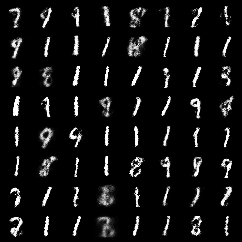



[25/50][0/60000]	Loss_D: 44.8971	Loss_G: 196.7276	D(x): 0.9070	D(G(z)): 0.1810 / 0.1622
[25/50][6400/60000]	Loss_D: 43.6969	Loss_G: 208.0699	D(x): 0.9155	D(G(z)): 0.1915 / 0.1447
[25/50][12800/60000]	Loss_D: 64.8921	Loss_G: 210.6963	D(x): 0.8707	D(G(z)): 0.1751 / 0.1488
[25/50][19200/60000]	Loss_D: 35.9279	Loss_G: 202.2695	D(x): 0.9338	D(G(z)): 0.1791 / 0.1525
[25/50][25600/60000]	Loss_D: 50.5412	Loss_G: 191.5317	D(x): 0.8817	D(G(z)): 0.1567 / 0.1535
[25/50][32000/60000]	Loss_D: 29.9823	Loss_G: 167.7166	D(x): 0.9285	D(G(z)): 0.1513 / 0.1521
[25/50][38400/60000]	Loss_D: 35.1735	Loss_G: 174.9271	D(x): 0.9307	D(G(z)): 0.1790 / 0.1665
[25/50][44800/60000]	Loss_D: 27.8543	Loss_G: 218.4359	D(x): 0.9229	D(G(z)): 0.1195 / 0.1043
[25/50][51200/60000]	Loss_D: 47.3018	Loss_G: 137.4574	D(x): 0.9354	D(G(z)): 0.3050 / 0.2517
[25/50][57600/60000]	Loss_D: 38.3929	Loss_G: 164.8203	D(x): 0.8995	D(G(z)): 0.1438 / 0.1648
====> Epoch: 25 Average generator loss: 1.4566 Average discriminator loss: 0.3201
=

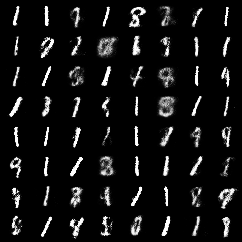



[26/50][0/60000]	Loss_D: 38.4813	Loss_G: 201.4129	D(x): 0.8900	D(G(z)): 0.1333 / 0.1092
[26/50][6400/60000]	Loss_D: 38.4504	Loss_G: 185.6841	D(x): 0.9039	D(G(z)): 0.1710 / 0.1505
[26/50][12800/60000]	Loss_D: 52.7555	Loss_G: 169.8062	D(x): 0.8850	D(G(z)): 0.2408 / 0.1869
[26/50][19200/60000]	Loss_D: 38.0058	Loss_G: 183.6942	D(x): 0.9230	D(G(z)): 0.1729 / 0.1435
[26/50][25600/60000]	Loss_D: 52.6503	Loss_G: 148.3877	D(x): 0.8999	D(G(z)): 0.2690 / 0.2341
[26/50][32000/60000]	Loss_D: 43.3731	Loss_G: 233.0509	D(x): 0.8856	D(G(z)): 0.1086 / 0.1018
[26/50][38400/60000]	Loss_D: 43.6363	Loss_G: 123.6404	D(x): 0.9262	D(G(z)): 0.2554 / 0.2558
[26/50][44800/60000]	Loss_D: 34.5303	Loss_G: 157.4954	D(x): 0.9426	D(G(z)): 0.2434 / 0.2021
[26/50][51200/60000]	Loss_D: 43.5167	Loss_G: 177.8777	D(x): 0.8995	D(G(z)): 0.1721 / 0.1620
[26/50][57600/60000]	Loss_D: 50.3916	Loss_G: 153.8357	D(x): 0.9110	D(G(z)): 0.2814 / 0.1997
====> Epoch: 26 Average generator loss: 1.3652 Average discriminator loss: 0.3401
=

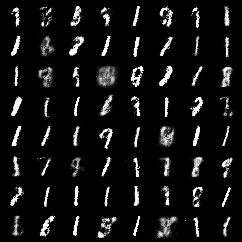



[27/50][0/60000]	Loss_D: 45.0137	Loss_G: 129.6689	D(x): 0.9149	D(G(z)): 0.2854 / 0.2611
[27/50][6400/60000]	Loss_D: 62.0526	Loss_G: 149.2876	D(x): 0.8616	D(G(z)): 0.2020 / 0.1938
[27/50][12800/60000]	Loss_D: 45.5271	Loss_G: 174.7311	D(x): 0.9113	D(G(z)): 0.1701 / 0.1638
[27/50][19200/60000]	Loss_D: 61.8491	Loss_G: 132.4544	D(x): 0.8707	D(G(z)): 0.2235 / 0.2245
[27/50][25600/60000]	Loss_D: 42.4060	Loss_G: 157.6916	D(x): 0.8941	D(G(z)): 0.1749 / 0.1716
[27/50][32000/60000]	Loss_D: 39.4787	Loss_G: 179.3202	D(x): 0.9603	D(G(z)): 0.2442 / 0.1831
[27/50][38400/60000]	Loss_D: 46.7936	Loss_G: 195.7839	D(x): 0.8756	D(G(z)): 0.1265 / 0.1165
[27/50][44800/60000]	Loss_D: 43.4035	Loss_G: 173.3791	D(x): 0.8856	D(G(z)): 0.1616 / 0.1417
[27/50][51200/60000]	Loss_D: 45.4272	Loss_G: 127.3145	D(x): 0.9089	D(G(z)): 0.3016 / 0.2525
[27/50][57600/60000]	Loss_D: 44.0368	Loss_G: 121.7436	D(x): 0.9253	D(G(z)): 0.2912 / 0.2830
====> Epoch: 27 Average generator loss: 1.3431 Average discriminator loss: 0.3433
=

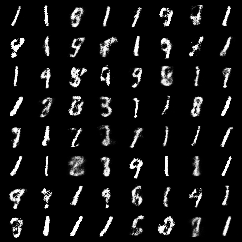



[28/50][0/60000]	Loss_D: 36.2472	Loss_G: 141.1407	D(x): 0.9305	D(G(z)): 0.2217 / 0.2193
[28/50][6400/60000]	Loss_D: 37.3139	Loss_G: 175.9803	D(x): 0.9058	D(G(z)): 0.1377 / 0.1461
[28/50][12800/60000]	Loss_D: 30.1244	Loss_G: 188.5655	D(x): 0.9281	D(G(z)): 0.1459 / 0.1351
[28/50][19200/60000]	Loss_D: 44.9410	Loss_G: 158.4185	D(x): 0.9142	D(G(z)): 0.2286 / 0.1761
[28/50][25600/60000]	Loss_D: 38.5703	Loss_G: 184.2085	D(x): 0.9106	D(G(z)): 0.1572 / 0.1407
[28/50][32000/60000]	Loss_D: 29.9228	Loss_G: 197.6172	D(x): 0.9331	D(G(z)): 0.1746 / 0.1582
[28/50][38400/60000]	Loss_D: 46.3476	Loss_G: 127.9272	D(x): 0.9260	D(G(z)): 0.3145 / 0.2508
[28/50][44800/60000]	Loss_D: 43.9823	Loss_G: 156.2525	D(x): 0.8932	D(G(z)): 0.2017 / 0.1799
[28/50][51200/60000]	Loss_D: 48.2472	Loss_G: 157.6006	D(x): 0.8828	D(G(z)): 0.1680 / 0.1738
[28/50][57600/60000]	Loss_D: 42.4210	Loss_G: 162.9047	D(x): 0.9151	D(G(z)): 0.2484 / 0.1741
====> Epoch: 28 Average generator loss: 1.3086 Average discriminator loss: 0.3329
=

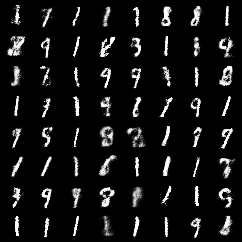



[29/50][0/60000]	Loss_D: 35.9758	Loss_G: 190.9770	D(x): 0.9400	D(G(z)): 0.2084 / 0.1790
[29/50][6400/60000]	Loss_D: 44.7428	Loss_G: 176.6808	D(x): 0.8828	D(G(z)): 0.1523 / 0.1546
[29/50][12800/60000]	Loss_D: 40.4287	Loss_G: 153.2773	D(x): 0.9090	D(G(z)): 0.2042 / 0.1783
[29/50][19200/60000]	Loss_D: 43.0057	Loss_G: 201.0121	D(x): 0.8788	D(G(z)): 0.1338 / 0.1262
[29/50][25600/60000]	Loss_D: 39.3060	Loss_G: 165.5406	D(x): 0.9159	D(G(z)): 0.1667 / 0.1538
[29/50][32000/60000]	Loss_D: 46.6207	Loss_G: 188.5887	D(x): 0.8621	D(G(z)): 0.1431 / 0.1090
[29/50][38400/60000]	Loss_D: 53.6041	Loss_G: 175.8243	D(x): 0.8955	D(G(z)): 0.2708 / 0.1815
[29/50][44800/60000]	Loss_D: 37.7117	Loss_G: 152.0740	D(x): 0.8905	D(G(z)): 0.1781 / 0.1826
[29/50][51200/60000]	Loss_D: 30.6209	Loss_G: 151.4276	D(x): 0.9376	D(G(z)): 0.2185 / 0.1787
[29/50][57600/60000]	Loss_D: 34.4705	Loss_G: 206.7586	D(x): 0.9164	D(G(z)): 0.1556 / 0.1209
====> Epoch: 29 Average generator loss: 1.2602 Average discriminator loss: 0.3446
=

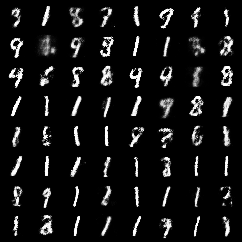



[30/50][0/60000]	Loss_D: 54.2755	Loss_G: 152.2218	D(x): 0.9226	D(G(z)): 0.2541 / 0.2300
[30/50][6400/60000]	Loss_D: 31.9614	Loss_G: 207.1705	D(x): 0.9144	D(G(z)): 0.1535 / 0.1136
[30/50][12800/60000]	Loss_D: 31.9053	Loss_G: 170.9307	D(x): 0.8952	D(G(z)): 0.1217 / 0.1298
[30/50][19200/60000]	Loss_D: 27.9391	Loss_G: 188.2955	D(x): 0.9196	D(G(z)): 0.1469 / 0.1316
[30/50][25600/60000]	Loss_D: 52.1471	Loss_G: 185.3045	D(x): 0.8620	D(G(z)): 0.1587 / 0.1321
[30/50][32000/60000]	Loss_D: 45.7704	Loss_G: 155.2608	D(x): 0.8738	D(G(z)): 0.1591 / 0.1820
[30/50][38400/60000]	Loss_D: 50.1592	Loss_G: 174.2083	D(x): 0.8602	D(G(z)): 0.1533 / 0.1468
[30/50][44800/60000]	Loss_D: 42.2710	Loss_G: 162.7709	D(x): 0.8935	D(G(z)): 0.1707 / 0.1692
[30/50][51200/60000]	Loss_D: 36.2013	Loss_G: 155.6674	D(x): 0.9058	D(G(z)): 0.2017 / 0.1755
[30/50][57600/60000]	Loss_D: 46.6438	Loss_G: 161.6750	D(x): 0.8701	D(G(z)): 0.2013 / 0.2104
====> Epoch: 30 Average generator loss: 1.2519 Average discriminator loss: 0.3438
=

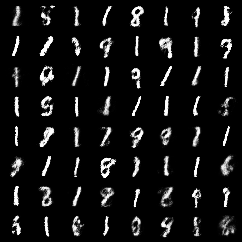



[31/50][0/60000]	Loss_D: 32.2738	Loss_G: 173.3929	D(x): 0.9129	D(G(z)): 0.1668 / 0.1448
[31/50][6400/60000]	Loss_D: 32.2189	Loss_G: 170.9738	D(x): 0.9028	D(G(z)): 0.1533 / 0.1318
[31/50][12800/60000]	Loss_D: 66.8489	Loss_G: 139.4729	D(x): 0.8729	D(G(z)): 0.2769 / 0.2223
[31/50][19200/60000]	Loss_D: 47.8626	Loss_G: 157.7747	D(x): 0.8717	D(G(z)): 0.1869 / 0.1839
[31/50][25600/60000]	Loss_D: 46.6888	Loss_G: 206.1986	D(x): 0.8406	D(G(z)): 0.0871 / 0.0835
[31/50][32000/60000]	Loss_D: 39.7932	Loss_G: 158.5585	D(x): 0.9099	D(G(z)): 0.2139 / 0.1859
[31/50][38400/60000]	Loss_D: 60.8637	Loss_G: 140.2413	D(x): 0.9255	D(G(z)): 0.3028 / 0.2694
[31/50][44800/60000]	Loss_D: 26.6804	Loss_G: 183.0730	D(x): 0.9209	D(G(z)): 0.1182 / 0.1117
[31/50][51200/60000]	Loss_D: 32.9163	Loss_G: 152.1817	D(x): 0.9301	D(G(z)): 0.2055 / 0.1901
[31/50][57600/60000]	Loss_D: 31.0004	Loss_G: 148.9014	D(x): 0.9524	D(G(z)): 0.2305 / 0.2054
====> Epoch: 31 Average generator loss: 1.2407 Average discriminator loss: 0.3463
=

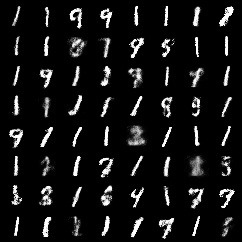



[32/50][0/60000]	Loss_D: 42.6513	Loss_G: 143.1547	D(x): 0.9519	D(G(z)): 0.2683 / 0.2346
[32/50][6400/60000]	Loss_D: 49.0440	Loss_G: 151.5649	D(x): 0.9087	D(G(z)): 0.2530 / 0.2168
[32/50][12800/60000]	Loss_D: 40.8858	Loss_G: 178.9448	D(x): 0.8649	D(G(z)): 0.1318 / 0.1420
[32/50][19200/60000]	Loss_D: 46.9124	Loss_G: 166.6011	D(x): 0.9194	D(G(z)): 0.2296 / 0.1836
[32/50][25600/60000]	Loss_D: 55.6353	Loss_G: 169.6646	D(x): 0.9121	D(G(z)): 0.2137 / 0.1887
[32/50][32000/60000]	Loss_D: 38.9600	Loss_G: 176.0565	D(x): 0.9321	D(G(z)): 0.2051 / 0.1623
[32/50][38400/60000]	Loss_D: 43.1076	Loss_G: 158.7580	D(x): 0.8765	D(G(z)): 0.1742 / 0.1928
[32/50][44800/60000]	Loss_D: 40.2931	Loss_G: 135.3799	D(x): 0.9315	D(G(z)): 0.2478 / 0.2489
[32/50][51200/60000]	Loss_D: 43.0508	Loss_G: 185.6428	D(x): 0.8941	D(G(z)): 0.1524 / 0.1552
[32/50][57600/60000]	Loss_D: 39.4487	Loss_G: 160.5935	D(x): 0.9052	D(G(z)): 0.1905 / 0.1698
====> Epoch: 32 Average generator loss: 1.2472 Average discriminator loss: 0.3545
=

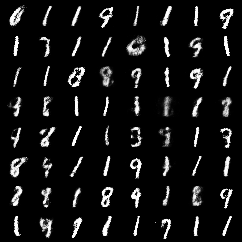



[33/50][0/60000]	Loss_D: 55.8461	Loss_G: 168.1491	D(x): 0.8460	D(G(z)): 0.1727 / 0.1718
[33/50][6400/60000]	Loss_D: 34.7903	Loss_G: 189.4134	D(x): 0.8955	D(G(z)): 0.1421 / 0.1312
[33/50][12800/60000]	Loss_D: 37.2025	Loss_G: 195.2200	D(x): 0.8943	D(G(z)): 0.1427 / 0.1423
[33/50][19200/60000]	Loss_D: 31.1553	Loss_G: 174.3606	D(x): 0.9219	D(G(z)): 0.1600 / 0.1327
[33/50][25600/60000]	Loss_D: 38.0671	Loss_G: 152.3613	D(x): 0.9101	D(G(z)): 0.2049 / 0.1903
[33/50][32000/60000]	Loss_D: 46.0780	Loss_G: 148.0511	D(x): 0.8826	D(G(z)): 0.2355 / 0.2048
[33/50][38400/60000]	Loss_D: 32.4971	Loss_G: 184.6542	D(x): 0.9135	D(G(z)): 0.1557 / 0.1357
[33/50][44800/60000]	Loss_D: 47.4030	Loss_G: 144.6091	D(x): 0.9196	D(G(z)): 0.2351 / 0.2189
[33/50][51200/60000]	Loss_D: 37.6463	Loss_G: 145.3317	D(x): 0.9113	D(G(z)): 0.2124 / 0.1749
[33/50][57600/60000]	Loss_D: 50.7798	Loss_G: 135.2933	D(x): 0.8933	D(G(z)): 0.2368 / 0.2124
====> Epoch: 33 Average generator loss: 1.2259 Average discriminator loss: 0.3576
=

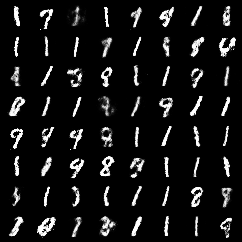



[34/50][0/60000]	Loss_D: 45.9392	Loss_G: 172.5662	D(x): 0.8765	D(G(z)): 0.1763 / 0.1497
[34/50][6400/60000]	Loss_D: 26.0930	Loss_G: 177.7903	D(x): 0.9393	D(G(z)): 0.1532 / 0.1388
[34/50][12800/60000]	Loss_D: 42.4647	Loss_G: 161.1030	D(x): 0.8642	D(G(z)): 0.1736 / 0.1662
[34/50][19200/60000]	Loss_D: 35.7756	Loss_G: 174.2129	D(x): 0.9305	D(G(z)): 0.2203 / 0.1721
[34/50][25600/60000]	Loss_D: 46.6145	Loss_G: 166.1855	D(x): 0.8730	D(G(z)): 0.1904 / 0.1771
[34/50][32000/60000]	Loss_D: 34.8495	Loss_G: 162.5492	D(x): 0.9352	D(G(z)): 0.2083 / 0.1959
[34/50][38400/60000]	Loss_D: 39.7677	Loss_G: 167.0831	D(x): 0.9269	D(G(z)): 0.2260 / 0.1801
[34/50][44800/60000]	Loss_D: 47.9786	Loss_G: 151.9935	D(x): 0.8652	D(G(z)): 0.1962 / 0.1975
[34/50][51200/60000]	Loss_D: 52.8141	Loss_G: 133.2478	D(x): 0.9033	D(G(z)): 0.2841 / 0.2445
[34/50][57600/60000]	Loss_D: 43.4589	Loss_G: 170.3031	D(x): 0.8875	D(G(z)): 0.1916 / 0.1742
====> Epoch: 34 Average generator loss: 1.2033 Average discriminator loss: 0.3512
=

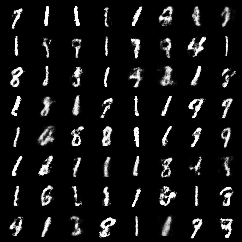



[35/50][0/60000]	Loss_D: 37.4767	Loss_G: 151.0740	D(x): 0.8989	D(G(z)): 0.2193 / 0.1737
[35/50][6400/60000]	Loss_D: 40.3477	Loss_G: 191.8235	D(x): 0.9000	D(G(z)): 0.1615 / 0.1549
[35/50][12800/60000]	Loss_D: 42.3667	Loss_G: 157.8538	D(x): 0.8982	D(G(z)): 0.2160 / 0.1861
[35/50][19200/60000]	Loss_D: 64.9140	Loss_G: 136.7368	D(x): 0.8486	D(G(z)): 0.2670 / 0.2346
[35/50][25600/60000]	Loss_D: 49.2722	Loss_G: 146.1614	D(x): 0.8807	D(G(z)): 0.2150 / 0.2289
[35/50][32000/60000]	Loss_D: 40.1231	Loss_G: 175.6797	D(x): 0.8987	D(G(z)): 0.1810 / 0.1353
[35/50][38400/60000]	Loss_D: 45.9400	Loss_G: 141.4696	D(x): 0.8907	D(G(z)): 0.2481 / 0.2360
[35/50][44800/60000]	Loss_D: 40.9195	Loss_G: 155.5202	D(x): 0.9083	D(G(z)): 0.2211 / 0.1990
[35/50][51200/60000]	Loss_D: 68.7981	Loss_G: 130.1777	D(x): 0.8393	D(G(z)): 0.2777 / 0.2396
[35/50][57600/60000]	Loss_D: 34.8463	Loss_G: 158.2508	D(x): 0.9160	D(G(z)): 0.1888 / 0.1602
====> Epoch: 35 Average generator loss: 1.1974 Average discriminator loss: 0.3681
=

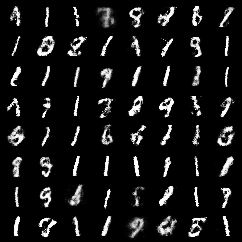



[36/50][0/60000]	Loss_D: 51.6907	Loss_G: 146.4653	D(x): 0.8631	D(G(z)): 0.2296 / 0.1991
[36/50][6400/60000]	Loss_D: 53.7222	Loss_G: 150.4896	D(x): 0.8667	D(G(z)): 0.2153 / 0.2032
[36/50][12800/60000]	Loss_D: 32.8934	Loss_G: 141.4552	D(x): 0.9383	D(G(z)): 0.2358 / 0.1943
[36/50][19200/60000]	Loss_D: 51.2755	Loss_G: 133.0372	D(x): 0.8957	D(G(z)): 0.2654 / 0.2640
[36/50][25600/60000]	Loss_D: 56.9535	Loss_G: 125.4977	D(x): 0.8879	D(G(z)): 0.2335 / 0.2468
[36/50][32000/60000]	Loss_D: 60.5918	Loss_G: 129.3972	D(x): 0.9046	D(G(z)): 0.3163 / 0.2533
[36/50][38400/60000]	Loss_D: 59.1791	Loss_G: 133.8552	D(x): 0.9005	D(G(z)): 0.3141 / 0.2461
[36/50][44800/60000]	Loss_D: 35.6954	Loss_G: 151.3248	D(x): 0.9257	D(G(z)): 0.2033 / 0.1870
[36/50][51200/60000]	Loss_D: 49.5324	Loss_G: 144.9717	D(x): 0.8751	D(G(z)): 0.2189 / 0.2122
[36/50][57600/60000]	Loss_D: 56.0781	Loss_G: 163.6677	D(x): 0.8432	D(G(z)): 0.1712 / 0.1791
====> Epoch: 36 Average generator loss: 1.1645 Average discriminator loss: 0.3649
=

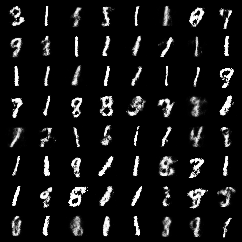



[37/50][0/60000]	Loss_D: 48.3821	Loss_G: 160.1246	D(x): 0.8523	D(G(z)): 0.1492 / 0.1484
[37/50][6400/60000]	Loss_D: 50.2361	Loss_G: 158.1287	D(x): 0.8599	D(G(z)): 0.1825 / 0.1816
[37/50][12800/60000]	Loss_D: 43.8483	Loss_G: 170.3934	D(x): 0.8888	D(G(z)): 0.2066 / 0.1725
[37/50][19200/60000]	Loss_D: 54.9117	Loss_G: 146.8195	D(x): 0.8650	D(G(z)): 0.2276 / 0.2071
[37/50][25600/60000]	Loss_D: 50.5112	Loss_G: 149.9669	D(x): 0.9065	D(G(z)): 0.2459 / 0.2150
[37/50][32000/60000]	Loss_D: 41.3674	Loss_G: 165.1046	D(x): 0.9017	D(G(z)): 0.2201 / 0.1727
[37/50][38400/60000]	Loss_D: 46.6589	Loss_G: 141.9214	D(x): 0.8963	D(G(z)): 0.2216 / 0.2244
[37/50][44800/60000]	Loss_D: 60.9368	Loss_G: 131.1528	D(x): 0.8903	D(G(z)): 0.2815 / 0.2744
[37/50][51200/60000]	Loss_D: 41.3097	Loss_G: 169.8634	D(x): 0.8829	D(G(z)): 0.1473 / 0.1461
[37/50][57600/60000]	Loss_D: 52.4524	Loss_G: 118.3628	D(x): 0.9133	D(G(z)): 0.3110 / 0.2790
====> Epoch: 37 Average generator loss: 1.1927 Average discriminator loss: 0.3638
=

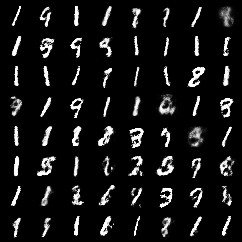



[38/50][0/60000]	Loss_D: 51.0048	Loss_G: 176.2150	D(x): 0.8883	D(G(z)): 0.2198 / 0.2003
[38/50][6400/60000]	Loss_D: 58.8669	Loss_G: 155.4740	D(x): 0.8899	D(G(z)): 0.2114 / 0.2154
[38/50][12800/60000]	Loss_D: 42.2957	Loss_G: 164.0423	D(x): 0.8760	D(G(z)): 0.1446 / 0.1475
[38/50][19200/60000]	Loss_D: 40.7442	Loss_G: 138.7634	D(x): 0.9085	D(G(z)): 0.2404 / 0.2265
[38/50][25600/60000]	Loss_D: 39.5708	Loss_G: 140.1706	D(x): 0.9106	D(G(z)): 0.2439 / 0.2245
[38/50][32000/60000]	Loss_D: 42.6694	Loss_G: 147.5685	D(x): 0.9120	D(G(z)): 0.2276 / 0.2097
[38/50][38400/60000]	Loss_D: 43.4643	Loss_G: 197.9379	D(x): 0.8657	D(G(z)): 0.1191 / 0.1096
[38/50][44800/60000]	Loss_D: 49.3118	Loss_G: 150.8884	D(x): 0.8805	D(G(z)): 0.1885 / 0.1884
[38/50][51200/60000]	Loss_D: 46.4788	Loss_G: 161.6340	D(x): 0.8726	D(G(z)): 0.1767 / 0.1582
[38/50][57600/60000]	Loss_D: 40.5761	Loss_G: 147.6271	D(x): 0.9210	D(G(z)): 0.2562 / 0.2211
====> Epoch: 38 Average generator loss: 1.1720 Average discriminator loss: 0.3622
=

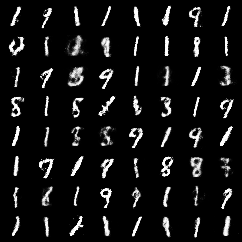



[39/50][0/60000]	Loss_D: 42.6164	Loss_G: 153.8393	D(x): 0.8801	D(G(z)): 0.1885 / 0.1777
[39/50][6400/60000]	Loss_D: 45.2160	Loss_G: 153.0154	D(x): 0.8870	D(G(z)): 0.2015 / 0.2084
[39/50][12800/60000]	Loss_D: 47.1744	Loss_G: 117.9575	D(x): 0.8984	D(G(z)): 0.2652 / 0.2653
[39/50][19200/60000]	Loss_D: 52.6674	Loss_G: 130.8492	D(x): 0.8935	D(G(z)): 0.2642 / 0.2396
[39/50][25600/60000]	Loss_D: 45.0713	Loss_G: 166.3794	D(x): 0.9129	D(G(z)): 0.2115 / 0.1796
[39/50][32000/60000]	Loss_D: 80.0589	Loss_G: 137.4561	D(x): 0.8049	D(G(z)): 0.2147 / 0.2335
[39/50][38400/60000]	Loss_D: 50.9641	Loss_G: 128.7890	D(x): 0.8857	D(G(z)): 0.2508 / 0.2463
[39/50][44800/60000]	Loss_D: 45.9234	Loss_G: 156.8727	D(x): 0.9041	D(G(z)): 0.2429 / 0.2014
[39/50][51200/60000]	Loss_D: 43.1185	Loss_G: 163.9056	D(x): 0.9167	D(G(z)): 0.2121 / 0.2098
[39/50][57600/60000]	Loss_D: 47.0642	Loss_G: 125.0465	D(x): 0.9169	D(G(z)): 0.2810 / 0.2753
====> Epoch: 39 Average generator loss: 1.1767 Average discriminator loss: 0.3593
=

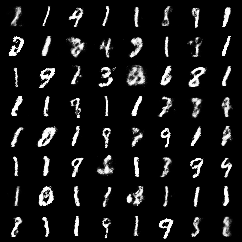



[40/50][0/60000]	Loss_D: 31.4600	Loss_G: 170.7460	D(x): 0.9149	D(G(z)): 0.1695 / 0.1267
[40/50][6400/60000]	Loss_D: 38.4716	Loss_G: 167.5554	D(x): 0.9448	D(G(z)): 0.2329 / 0.1863
[40/50][12800/60000]	Loss_D: 42.0077	Loss_G: 123.5538	D(x): 0.9115	D(G(z)): 0.2374 / 0.2471
[40/50][19200/60000]	Loss_D: 41.7984	Loss_G: 133.6680	D(x): 0.9011	D(G(z)): 0.2406 / 0.2247
[40/50][25600/60000]	Loss_D: 47.1438	Loss_G: 134.8351	D(x): 0.9047	D(G(z)): 0.2381 / 0.2358
[40/50][32000/60000]	Loss_D: 51.4199	Loss_G: 138.4753	D(x): 0.8652	D(G(z)): 0.2150 / 0.2247
[40/50][38400/60000]	Loss_D: 53.4130	Loss_G: 135.1698	D(x): 0.8918	D(G(z)): 0.2803 / 0.2326
[40/50][44800/60000]	Loss_D: 39.2194	Loss_G: 152.8627	D(x): 0.9000	D(G(z)): 0.2127 / 0.1841
[40/50][51200/60000]	Loss_D: 56.4231	Loss_G: 166.9953	D(x): 0.8393	D(G(z)): 0.1763 / 0.1792
[40/50][57600/60000]	Loss_D: 40.9166	Loss_G: 148.0294	D(x): 0.8992	D(G(z)): 0.2079 / 0.1955
====> Epoch: 40 Average generator loss: 1.1389 Average discriminator loss: 0.3570
=

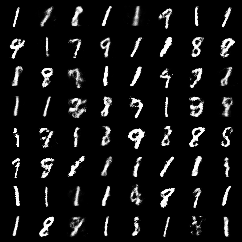



[41/50][0/60000]	Loss_D: 58.0209	Loss_G: 177.0887	D(x): 0.8235	D(G(z)): 0.1609 / 0.1487
[41/50][6400/60000]	Loss_D: 46.9698	Loss_G: 161.6139	D(x): 0.8948	D(G(z)): 0.2192 / 0.2070
[41/50][12800/60000]	Loss_D: 45.1105	Loss_G: 150.1339	D(x): 0.8783	D(G(z)): 0.1845 / 0.1838
[41/50][19200/60000]	Loss_D: 40.7596	Loss_G: 145.8373	D(x): 0.8845	D(G(z)): 0.1979 / 0.1859
[41/50][25600/60000]	Loss_D: 47.3556	Loss_G: 122.5061	D(x): 0.8751	D(G(z)): 0.2606 / 0.2630
[41/50][32000/60000]	Loss_D: 56.0478	Loss_G: 106.0531	D(x): 0.9152	D(G(z)): 0.3452 / 0.3091
[41/50][38400/60000]	Loss_D: 42.7140	Loss_G: 150.8875	D(x): 0.8825	D(G(z)): 0.1947 / 0.2131
[41/50][44800/60000]	Loss_D: 52.3613	Loss_G: 151.3100	D(x): 0.8725	D(G(z)): 0.1892 / 0.1861
[41/50][51200/60000]	Loss_D: 53.3049	Loss_G: 129.0349	D(x): 0.8679	D(G(z)): 0.2297 / 0.2294
[41/50][57600/60000]	Loss_D: 53.4813	Loss_G: 163.7760	D(x): 0.8423	D(G(z)): 0.2002 / 0.1956
====> Epoch: 41 Average generator loss: 1.1242 Average discriminator loss: 0.3595
=

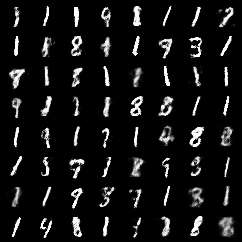



[42/50][0/60000]	Loss_D: 47.8439	Loss_G: 119.3311	D(x): 0.8768	D(G(z)): 0.2592 / 0.2296
[42/50][6400/60000]	Loss_D: 41.7819	Loss_G: 139.1151	D(x): 0.8939	D(G(z)): 0.2278 / 0.2175
[42/50][12800/60000]	Loss_D: 39.3064	Loss_G: 146.2406	D(x): 0.9103	D(G(z)): 0.2242 / 0.2057
[42/50][19200/60000]	Loss_D: 49.4906	Loss_G: 107.6565	D(x): 0.8818	D(G(z)): 0.2642 / 0.2810
[42/50][25600/60000]	Loss_D: 43.9518	Loss_G: 140.7443	D(x): 0.9055	D(G(z)): 0.2548 / 0.2220
[42/50][32000/60000]	Loss_D: 33.2983	Loss_G: 174.7138	D(x): 0.8939	D(G(z)): 0.1511 / 0.1505
[42/50][38400/60000]	Loss_D: 54.6582	Loss_G: 131.9484	D(x): 0.8766	D(G(z)): 0.2223 / 0.2212
[42/50][44800/60000]	Loss_D: 41.9961	Loss_G: 162.5269	D(x): 0.8936	D(G(z)): 0.1976 / 0.1682
[42/50][51200/60000]	Loss_D: 42.6472	Loss_G: 126.0179	D(x): 0.9014	D(G(z)): 0.2442 / 0.2148
[42/50][57600/60000]	Loss_D: 43.6740	Loss_G: 127.7886	D(x): 0.9050	D(G(z)): 0.2559 / 0.2403
====> Epoch: 42 Average generator loss: 1.1156 Average discriminator loss: 0.3554
=

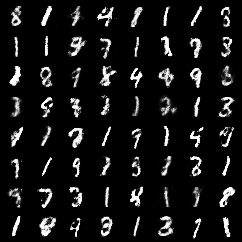



[43/50][0/60000]	Loss_D: 34.8966	Loss_G: 137.3153	D(x): 0.9167	D(G(z)): 0.2200 / 0.1947
[43/50][6400/60000]	Loss_D: 45.4611	Loss_G: 177.6153	D(x): 0.8726	D(G(z)): 0.1808 / 0.1377
[43/50][12800/60000]	Loss_D: 55.2627	Loss_G: 135.4945	D(x): 0.8529	D(G(z)): 0.2165 / 0.2026
[43/50][19200/60000]	Loss_D: 53.4428	Loss_G: 129.9558	D(x): 0.8557	D(G(z)): 0.2416 / 0.2402
[43/50][25600/60000]	Loss_D: 39.1330	Loss_G: 123.5149	D(x): 0.9135	D(G(z)): 0.2641 / 0.2342
[43/50][32000/60000]	Loss_D: 34.7141	Loss_G: 152.4906	D(x): 0.9077	D(G(z)): 0.1904 / 0.1837
[43/50][38400/60000]	Loss_D: 57.0385	Loss_G: 130.2770	D(x): 0.9029	D(G(z)): 0.2853 / 0.2603
[43/50][44800/60000]	Loss_D: 51.3283	Loss_G: 109.9277	D(x): 0.9047	D(G(z)): 0.3081 / 0.2843
[43/50][51200/60000]	Loss_D: 35.7727	Loss_G: 151.5224	D(x): 0.9224	D(G(z)): 0.2106 / 0.1920
[43/50][57600/60000]	Loss_D: 44.9523	Loss_G: 157.3245	D(x): 0.8884	D(G(z)): 0.1932 / 0.1883
====> Epoch: 43 Average generator loss: 1.1182 Average discriminator loss: 0.3523
=

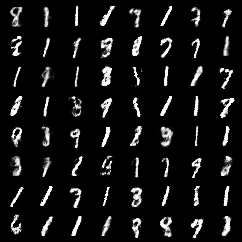



[44/50][0/60000]	Loss_D: 44.2042	Loss_G: 152.6505	D(x): 0.9006	D(G(z)): 0.2099 / 0.1871
[44/50][6400/60000]	Loss_D: 49.8255	Loss_G: 161.5422	D(x): 0.8715	D(G(z)): 0.1853 / 0.1674
[44/50][12800/60000]	Loss_D: 50.6531	Loss_G: 139.2081	D(x): 0.9107	D(G(z)): 0.2329 / 0.2196
[44/50][19200/60000]	Loss_D: 46.9203	Loss_G: 143.2528	D(x): 0.9022	D(G(z)): 0.2398 / 0.2339
[44/50][25600/60000]	Loss_D: 52.6375	Loss_G: 123.9986	D(x): 0.8584	D(G(z)): 0.2175 / 0.2438
[44/50][32000/60000]	Loss_D: 54.3504	Loss_G: 164.2720	D(x): 0.8507	D(G(z)): 0.1638 / 0.1697
[44/50][38400/60000]	Loss_D: 52.1335	Loss_G: 158.8316	D(x): 0.8810	D(G(z)): 0.2057 / 0.1904
[44/50][44800/60000]	Loss_D: 38.8603	Loss_G: 128.3909	D(x): 0.9337	D(G(z)): 0.2597 / 0.2372
[44/50][51200/60000]	Loss_D: 51.9157	Loss_G: 165.7106	D(x): 0.8455	D(G(z)): 0.1704 / 0.1605
[44/50][57600/60000]	Loss_D: 46.1073	Loss_G: 119.9918	D(x): 0.8968	D(G(z)): 0.2897 / 0.2645
====> Epoch: 44 Average generator loss: 1.1329 Average discriminator loss: 0.3539
=

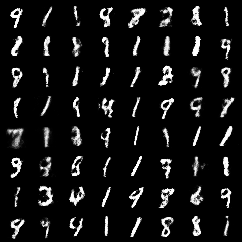



[45/50][0/60000]	Loss_D: 41.9238	Loss_G: 145.6343	D(x): 0.9107	D(G(z)): 0.2419 / 0.2079
[45/50][6400/60000]	Loss_D: 40.0435	Loss_G: 164.7726	D(x): 0.9046	D(G(z)): 0.2041 / 0.1622
[45/50][12800/60000]	Loss_D: 48.6726	Loss_G: 171.0418	D(x): 0.8796	D(G(z)): 0.1878 / 0.1545
[45/50][19200/60000]	Loss_D: 39.8087	Loss_G: 139.0748	D(x): 0.8923	D(G(z)): 0.2005 / 0.2008
[45/50][25600/60000]	Loss_D: 32.6676	Loss_G: 191.3469	D(x): 0.8953	D(G(z)): 0.1436 / 0.1286
[45/50][32000/60000]	Loss_D: 42.1178	Loss_G: 165.1345	D(x): 0.8968	D(G(z)): 0.1884 / 0.1681
[45/50][38400/60000]	Loss_D: 45.9038	Loss_G: 175.1519	D(x): 0.8870	D(G(z)): 0.2036 / 0.1699
[45/50][44800/60000]	Loss_D: 43.9646	Loss_G: 154.9828	D(x): 0.8770	D(G(z)): 0.1835 / 0.1790
[45/50][51200/60000]	Loss_D: 45.0521	Loss_G: 140.4806	D(x): 0.8660	D(G(z)): 0.2026 / 0.2137
[45/50][57600/60000]	Loss_D: 43.9312	Loss_G: 134.5675	D(x): 0.9218	D(G(z)): 0.2717 / 0.2354
====> Epoch: 45 Average generator loss: 1.1324 Average discriminator loss: 0.3546
=

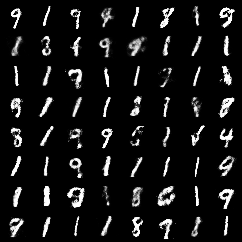



[46/50][0/60000]	Loss_D: 33.4873	Loss_G: 170.9322	D(x): 0.9003	D(G(z)): 0.1813 / 0.1618
[46/50][6400/60000]	Loss_D: 47.1847	Loss_G: 159.8499	D(x): 0.8938	D(G(z)): 0.1858 / 0.1631
[46/50][12800/60000]	Loss_D: 43.5448	Loss_G: 135.6970	D(x): 0.8955	D(G(z)): 0.2330 / 0.2189
[46/50][19200/60000]	Loss_D: 36.3807	Loss_G: 156.2526	D(x): 0.9019	D(G(z)): 0.2097 / 0.1648
[46/50][25600/60000]	Loss_D: 48.1066	Loss_G: 132.6564	D(x): 0.8891	D(G(z)): 0.2496 / 0.2242
[46/50][32000/60000]	Loss_D: 30.5662	Loss_G: 145.5432	D(x): 0.9207	D(G(z)): 0.1902 / 0.1996
[46/50][38400/60000]	Loss_D: 60.8193	Loss_G: 113.9068	D(x): 0.8676	D(G(z)): 0.2882 / 0.2874
[46/50][44800/60000]	Loss_D: 58.9805	Loss_G: 109.9355	D(x): 0.8945	D(G(z)): 0.3188 / 0.3149
[46/50][51200/60000]	Loss_D: 46.7416	Loss_G: 133.3254	D(x): 0.9116	D(G(z)): 0.2731 / 0.2452
[46/50][57600/60000]	Loss_D: 55.2099	Loss_G: 143.1821	D(x): 0.9003	D(G(z)): 0.2758 / 0.2294
====> Epoch: 46 Average generator loss: 1.1368 Average discriminator loss: 0.3543
=

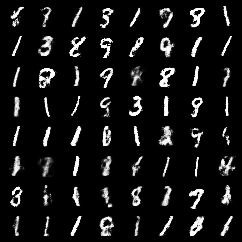



[47/50][0/60000]	Loss_D: 36.5528	Loss_G: 146.9977	D(x): 0.8915	D(G(z)): 0.1867 / 0.1838
[47/50][6400/60000]	Loss_D: 37.1798	Loss_G: 152.1681	D(x): 0.9370	D(G(z)): 0.2281 / 0.1981
[47/50][12800/60000]	Loss_D: 38.4719	Loss_G: 131.2363	D(x): 0.9210	D(G(z)): 0.2684 / 0.2245
[47/50][19200/60000]	Loss_D: 36.6530	Loss_G: 140.3962	D(x): 0.9071	D(G(z)): 0.2141 / 0.1860
[47/50][25600/60000]	Loss_D: 48.3845	Loss_G: 149.4170	D(x): 0.8621	D(G(z)): 0.2023 / 0.1977
[47/50][32000/60000]	Loss_D: 40.7108	Loss_G: 170.1071	D(x): 0.8729	D(G(z)): 0.1586 / 0.1529
[47/50][38400/60000]	Loss_D: 40.6629	Loss_G: 166.1555	D(x): 0.8955	D(G(z)): 0.1860 / 0.1603
[47/50][44800/60000]	Loss_D: 52.2063	Loss_G: 123.3815	D(x): 0.8799	D(G(z)): 0.2559 / 0.2355
[47/50][51200/60000]	Loss_D: 40.5200	Loss_G: 152.7907	D(x): 0.8999	D(G(z)): 0.2024 / 0.1905
[47/50][57600/60000]	Loss_D: 46.4934	Loss_G: 114.8361	D(x): 0.9205	D(G(z)): 0.2906 / 0.2696
====> Epoch: 47 Average generator loss: 1.1145 Average discriminator loss: 0.3480
=

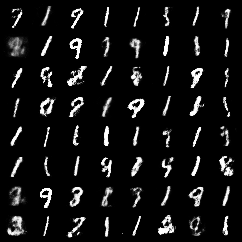



[48/50][0/60000]	Loss_D: 49.6288	Loss_G: 164.0939	D(x): 0.8626	D(G(z)): 0.1864 / 0.1646
[48/50][6400/60000]	Loss_D: 54.5461	Loss_G: 128.2686	D(x): 0.8892	D(G(z)): 0.3004 / 0.2687
[48/50][12800/60000]	Loss_D: 49.5932	Loss_G: 143.1655	D(x): 0.8672	D(G(z)): 0.2329 / 0.2133
[48/50][19200/60000]	Loss_D: 42.7046	Loss_G: 144.6925	D(x): 0.8956	D(G(z)): 0.2265 / 0.1912
[48/50][25600/60000]	Loss_D: 43.0290	Loss_G: 161.1161	D(x): 0.8927	D(G(z)): 0.1792 / 0.1711
[48/50][32000/60000]	Loss_D: 41.7229	Loss_G: 152.6633	D(x): 0.8831	D(G(z)): 0.1975 / 0.1784
[48/50][38400/60000]	Loss_D: 43.6260	Loss_G: 145.7730	D(x): 0.8669	D(G(z)): 0.1720 / 0.1800
[48/50][44800/60000]	Loss_D: 29.2201	Loss_G: 178.9869	D(x): 0.9201	D(G(z)): 0.1570 / 0.1475
[48/50][51200/60000]	Loss_D: 48.5167	Loss_G: 166.1823	D(x): 0.8562	D(G(z)): 0.1581 / 0.1572
[48/50][57600/60000]	Loss_D: 47.7952	Loss_G: 151.6764	D(x): 0.8906	D(G(z)): 0.2269 / 0.2177
====> Epoch: 48 Average generator loss: 1.1076 Average discriminator loss: 0.3462
=

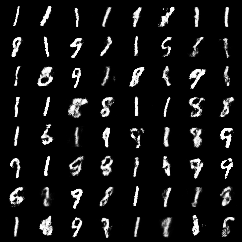



[49/50][0/60000]	Loss_D: 45.7892	Loss_G: 172.1153	D(x): 0.9278	D(G(z)): 0.2163 / 0.1928
[49/50][6400/60000]	Loss_D: 54.7522	Loss_G: 108.5362	D(x): 0.8626	D(G(z)): 0.2766 / 0.2665
[49/50][12800/60000]	Loss_D: 45.7426	Loss_G: 142.8099	D(x): 0.8928	D(G(z)): 0.2130 / 0.2021
[49/50][19200/60000]	Loss_D: 44.9466	Loss_G: 129.9407	D(x): 0.9000	D(G(z)): 0.2501 / 0.2297
[49/50][25600/60000]	Loss_D: 38.4605	Loss_G: 144.1179	D(x): 0.9060	D(G(z)): 0.1916 / 0.1757
[49/50][32000/60000]	Loss_D: 46.7081	Loss_G: 139.8102	D(x): 0.9087	D(G(z)): 0.2422 / 0.2219
[49/50][38400/60000]	Loss_D: 51.5757	Loss_G: 121.1217	D(x): 0.8796	D(G(z)): 0.2382 / 0.2558
[49/50][44800/60000]	Loss_D: 48.8478	Loss_G: 150.6180	D(x): 0.8932	D(G(z)): 0.2366 / 0.2012
[49/50][51200/60000]	Loss_D: 53.4604	Loss_G: 162.6416	D(x): 0.8578	D(G(z)): 0.1907 / 0.1609
[49/50][57600/60000]	Loss_D: 42.7710	Loss_G: 132.3880	D(x): 0.9164	D(G(z)): 0.2745 / 0.2300
====> Epoch: 49 Average generator loss: 1.1380 Average discriminator loss: 0.3421
=

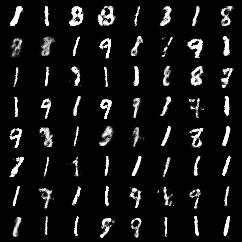



[50/50][0/60000]	Loss_D: 38.1678	Loss_G: 159.2439	D(x): 0.8866	D(G(z)): 0.1928 / 0.1772
[50/50][6400/60000]	Loss_D: 30.4985	Loss_G: 170.6547	D(x): 0.9253	D(G(z)): 0.1923 / 0.1633
[50/50][12800/60000]	Loss_D: 32.5258	Loss_G: 155.3152	D(x): 0.9145	D(G(z)): 0.1823 / 0.1666
[50/50][19200/60000]	Loss_D: 32.5518	Loss_G: 142.2918	D(x): 0.9345	D(G(z)): 0.2360 / 0.2084
[50/50][25600/60000]	Loss_D: 32.7718	Loss_G: 158.1515	D(x): 0.9237	D(G(z)): 0.1842 / 0.1755
[50/50][32000/60000]	Loss_D: 39.0231	Loss_G: 134.7233	D(x): 0.9116	D(G(z)): 0.2279 / 0.2175
[50/50][38400/60000]	Loss_D: 56.0973	Loss_G: 131.3560	D(x): 0.8709	D(G(z)): 0.2444 / 0.2446
[50/50][44800/60000]	Loss_D: 49.4547	Loss_G: 127.4045	D(x): 0.8964	D(G(z)): 0.2673 / 0.2431
[50/50][51200/60000]	Loss_D: 41.7512	Loss_G: 138.0667	D(x): 0.9033	D(G(z)): 0.2173 / 0.2074
[50/50][57600/60000]	Loss_D: 34.8935	Loss_G: 166.1938	D(x): 0.9048	D(G(z)): 0.1514 / 0.1470
====> Epoch: 50 Average generator loss: 1.1586 Average discriminator loss: 0.3411
=

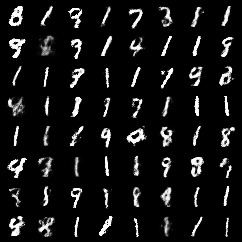

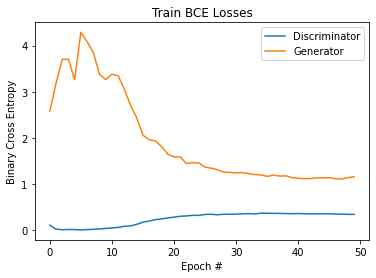

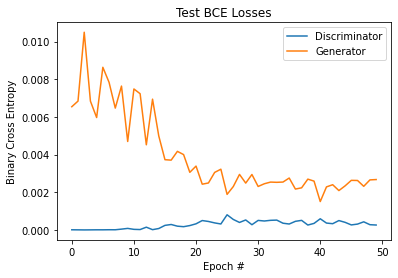

In [6]:
# train and test gan
epochs = 50
discriminator_average_train_losses = []
discriminator_average_test_losses = []
generator_average_train_losses = []
generator_average_test_losses = []
generator_model = Generator().to(device)
generator_optimizer = optim.Adam(generator_model.parameters(), lr=1e-3)
discriminator_model = Discriminator().to(device)
discriminator_optimizer = optim.Adam(discriminator_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    generator_average_train_loss, discriminator_average_train_loss = gan_train(epoch, generator_model, generator_optimizer, discriminator_model, discriminator_optimizer)
    discriminator_average_train_losses.append(discriminator_average_train_loss)
    generator_average_train_losses.append(generator_average_train_loss)
    generator_average_test_loss, discriminator_average_test_loss = gan_test(epoch, generator_model, discriminator_model)
    discriminator_average_test_losses.append(discriminator_average_test_loss)
    generator_average_test_losses.append(generator_average_test_loss)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = generator_model(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

# Plot Train losses
plt.plot(discriminator_average_train_losses)
plt.plot(generator_average_train_losses)
plt.title('Train BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()

# Plot Test Losses
plt.plot(discriminator_average_test_losses)
plt.plot(generator_average_test_losses)
plt.title('Test BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()


# Discussion

> Comparing the samples generated by the generative models, VAE and GAN, we see that, GAN generates better quality image samples in terms of sharpness compared to VAE model. This is because VAE is a probabilistic model, where we optimize the lower variational, thus it does not generate sharp images. We could say that this model doesnot therefore learn the posterior distribution quite well.

> Whereas, the GAN model optimization is based on game theory, where the generator model competes against its adversary, which is the discriminator model. The two model gets trained together until the discriminator is fooled half of the time, that is, the generator model generates plausible examples (which are similar to the input dataset). This would enable the model to learn the latent vector and thus the samples drawn would be realistic and representative of the input distribution as closely as possible. Thus, the generated images of GAN is much sharp than that generated by VAE.

> Here, we see that the generated sample contains an excess of a single image. This condition is known as mode collapse. This is because, the generator tends to learn the data image that the discriminator can easily fooled  by. Thus, it doesnot learn other images that well. This would result in an increase in the generation of this image. Here, we see that the data image if "1" is generated often because this is the simplest image in the dataset that can be easily fooled.

> We see that the plot of generator and discriminator converges towards each other and this is an expected behaviour. The accuracy of the discriminator is 0.5%.







